<a href="https://colab.research.google.com/github/farahinamir/Master-Project/blob/main/2015_2025_Earthquakes_Analysis%20using%20Random%20Forest%20and%20XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Loading

In [1]:
import pandas as pd

In [92]:
# prompt: read file

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Earthquakes data/2015-2025-05-05.csv')
print("\nEarthquake dataset:")
df.head()


Earthquake dataset:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-05T21:14:02.950Z,64.6302,-17.4981,10.000,5.3,mww,91.0,42.0,1.650,0.36,...,2025-05-28T01:37:16.040Z,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083,14.0,reviewed,us,us
1,2025-05-05T13:15:47.116Z,-28.2867,-176.5617,12.659,5.0,mb,61.0,78.0,1.534,0.59,...,2025-05-22T16:08:24.040Z,Kermadec Islands region,earthquake,10.68,3.974,0.074,58.0,reviewed,us,us
2,2025-05-05T10:53:27.776Z,23.9090,121.9671,27.000,5.6,mww,144.0,34.0,0.430,0.90,...,2025-06-09T13:07:21.412Z,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053,34.0,reviewed,us,us
3,2025-05-05T10:09:59.032Z,23.9405,122.0201,10.000,5.3,mb,133.0,34.0,0.453,0.83,...,2025-05-29T10:20:13.704Z,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033,315.0,reviewed,us,us
4,2025-05-05T09:46:46.882Z,-29.4675,-71.9242,22.933,5.1,mww,125.0,71.0,0.747,0.98,...,2025-06-09T13:12:30.040Z,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083,14.0,reviewed,us,us


In [3]:
df.shape

(17498, 22)

In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17498 entries, 0 to 17497
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             17498 non-null  object 
 1   latitude         17498 non-null  float64
 2   longitude        17498 non-null  float64
 3   depth            17498 non-null  float64
 4   mag              17498 non-null  float64
 5   magType          17498 non-null  object 
 6   nst              5095 non-null   float64
 7   gap              17333 non-null  float64
 8   dmin             17324 non-null  float64
 9   rms              17497 non-null  float64
 10  net              17498 non-null  object 
 11  id               17498 non-null  object 
 12  updated          17498 non-null  object 
 13  place            17498 non-null  object 
 14  type             17498 non-null  object 
 15  horizontalError  17376 non-null  float64
 16  depthError       17498 non-null  float64
 17  magError    

In [5]:
# SORTING
df_sorted = df.sort_values(by='time', ascending=False)
df_sorted.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-05T21:14:02.950Z,64.6302,-17.4981,10.000,5.3,mww,91.0,42.0,1.650,0.36,...,2025-05-28T01:37:16.040Z,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083,14.0,reviewed,us,us
1,2025-05-05T13:15:47.116Z,-28.2867,-176.5617,12.659,5.0,mb,61.0,78.0,1.534,0.59,...,2025-05-22T16:08:24.040Z,Kermadec Islands region,earthquake,10.68,3.974,0.074,58.0,reviewed,us,us
2,2025-05-05T10:53:27.776Z,23.9090,121.9671,27.000,5.6,mww,144.0,34.0,0.430,0.90,...,2025-06-09T13:07:21.412Z,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053,34.0,reviewed,us,us
3,2025-05-05T10:09:59.032Z,23.9405,122.0201,10.000,5.3,mb,133.0,34.0,0.453,0.83,...,2025-05-29T10:20:13.704Z,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033,315.0,reviewed,us,us
4,2025-05-05T09:46:46.882Z,-29.4675,-71.9242,22.933,5.1,mww,125.0,71.0,0.747,0.98,...,2025-06-09T13:12:30.040Z,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083,14.0,reviewed,us,us


In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,17498.000000,17498.000000,17498.000000,17498.000000,5095.000000,17333.000000,17324.000000,17497.000000,17376.000000,17498.000000,16080.000000,16182.000000
mean,-3.248310,31.912776,52.992390,5.333632,113.880667,59.866380,4.286172,0.819259,7.605025,2.886100,0.065819,75.763564
std,30.601157,123.878426,103.530083,0.404508,62.640356,34.411397,5.222310,0.231626,2.406828,1.844948,0.026016,98.597413
min,-71.733900,-179.989700,-1.010000,5.000000,6.000000,8.000000,0.000000,0.060000,0.080000,0.000000,0.000000,0.000000
25%,-22.927850,-74.423750,10.000000,5.100000,70.000000,35.000000,1.277000,0.660000,6.100000,1.800000,0.049000,20.000000
50%,-5.837050,87.465300,11.990000,5.200000,102.000000,53.000000,2.576500,0.800000,7.500000,1.900000,0.062000,40.000000
75%,18.303125,142.119575,45.480000,5.500000,139.500000,76.000000,5.130250,0.960000,9.100000,4.000000,0.080000,87.000000
max,87.386000,179.998100,670.810000,8.300000,619.000000,340.000000,41.046000,2.820000,21.100000,32.570000,0.563000,954.000000


In [7]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,12403
gap,165
dmin,174
rms,1


In [8]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

#Cleanning

In [9]:
df['time'] = pd.to_datetime(df['time'])

In [10]:
df = df.drop(['nst','dmin', 'magNst', 'id','updated','net','status','locationSource','magSource'], axis=1)

For the columns with a small number of missing values (nst, gap, horizontalError), you can impute the missing values with the mean of the non-missing values.

In [11]:
df['gap'] = df['gap'].fillna(df['gap'].mean())
df['rms'] = df['rms'].fillna(df['rms'].mean())
df['magError'] = df['magError'].fillna(df['magError'].mean())
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].mean())

In [12]:
df

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,mww,42.00000,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083000
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,mb,78.00000,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074000
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,mww,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053000
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,mb,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033000
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,mww,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,mwr,76.00000,1.33,"233 km W of Port McNeill, Canada",earthquake,6.00,1.800,0.065819
17494,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,mwc,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,1.900,0.065819
17495,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,mwc,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,1.900,0.065819
17496,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,mw,271.00000,0.19,"128 km W of Ferndale, California",earthquake,1.48,11.770,0.065819


In [13]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
gap,0
rms,0
place,0
type,0


In [14]:
#  generate new column of country based on longitude and latitude

!pip install reverse_geocoder

import reverse_geocoder as rg

def get_country(row):
  coordinates = (row['latitude'], row['longitude'])
  result = rg.search(coordinates)
  return result[0]['cc']

df['Country'] = df.apply(get_country, axis=1)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268067 sha256=ec529365fe087d50abf3b5bd644dbfcfd4c188e310a97f9b01354b1f41ad6ee5
  Stored in directory: /root/.cache/pip/wheels/11/e1/67/6e47f0ad41ea1843d37e1fbe79c6074744a1f4aace641cf800
Successfully built reverse_geocoder
Loading formatted geocoded file...


,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.4981,10.000,5.3,mww,42.0,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083,IS
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.5617,12.659,5.0,mb,78.0,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074,TO
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.9671,27.000,5.6,mww,34.0,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053,TW
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.0201,10.000,5.3,mb,34.0,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033,TW
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.9242,22.933,5.1,mww,71.0,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083,CL


In [15]:
# Mapping country codes to country names
country_code_to_name = {
    'AF': 'Afghanistan', 'AX': 'Aland Islands', 'AL': 'Albania', 'DZ': 'Algeria', 'AS': 'American Samoa',
    'AD': 'Andorra', 'AO': 'Angola', 'AI': 'Anguilla', 'AQ': 'Antarctica', 'AG': 'Antigua and Barbuda',
    'AR': 'Argentina', 'AM': 'Armenia', 'AW': 'Aruba', 'AU': 'Australia', 'AT': 'Austria', 'AZ': 'Azerbaijan',
    'BS': 'Bahamas', 'BH': 'Bahrain', 'BD': 'Bangladesh', 'BB': 'Barbados', 'BY': 'Belarus', 'BE': 'Belgium',
    'BZ': 'Belize', 'BJ': 'Benin', 'BM': 'Bermuda', 'BT': 'Bhutan', 'BO': 'Bolivia', 'BQ': 'Bonaire, Sint Eustatius and Saba',
    'BA': 'Bosnia and Herzegovina', 'BW': 'Botswana', 'BV': 'Bouvet Island', 'BR': 'Brazil', 'IO': 'British Indian Ocean Territory',
    'BN': 'Brunei Darussalam', 'BG': 'Bulgaria', 'BF': 'Burkina Faso', 'BI': 'Burundi', 'CV': 'Cabo Verde',
    'KH': 'Cambodia', 'CM': 'Cameroon', 'CA': 'Canada', 'KY': 'Cayman Islands', 'CF': 'Central African Republic',
    'TD': 'Chad', 'CL': 'Chile', 'CN': 'China', 'CX': 'Christmas Island', 'CC': 'Cocos (Keeling) Islands',
    'CO': 'Colombia', 'KM': 'Comoros', 'CG': 'Congo', 'CD': 'Congo, The Democratic Republic of the',
    'CK': 'Cook Islands', 'CR': 'Costa Rica', 'CI': 'Cote d\'Ivoire', 'HR': 'Croatia', 'CU': 'Cuba', 'CW': 'Curacao',
    'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DK': 'Denmark', 'DJ': 'Djibouti', 'DM': 'Dominica',
    'DO': 'Dominican Republic', 'EC': 'Ecuador', 'EG': 'Egypt', 'SV': 'El Salvador', 'GQ': 'Equatorial Guinea',
    'ER': 'Eritrea', 'EE': 'Estonia', 'ET': 'Ethiopia', 'FK': 'Falkland Islands (Malvinas)', 'FO': 'Faroe Islands',
    'FJ': 'Fiji', 'FI': 'Finland', 'FR': 'France', 'GF': 'French Guiana', 'PF': 'French Polynesia',
    'TF': 'French Southern Territories', 'GA': 'Gabon', 'GM': 'Gambia', 'GE': 'Georgia', 'DE': 'Germany',
    'GH': 'Ghana', 'GI': 'Gibraltar', 'GR': 'Greece', 'GL': 'Greenland', 'GD': 'Grenada', 'GP': 'Guadeloupe',
    'GU': 'Guam', 'GT': 'Guatemala', 'GG': 'Guernsey', 'GN': 'Guinea', 'GW': 'Guinea-Bissau', 'GY': 'Guyana',
    'HT': 'Haiti', 'HM': 'Heard Island and McDonald Islands', 'VA': 'Holy See (Vatican City State)', 'HN': 'Honduras',
    'HK': 'Hong Kong', 'HU': 'Hungary', 'IS': 'Iceland', 'IN': 'India', 'ID': 'Indonesia', 'IR': 'Iran',
    'IQ': 'Iraq', 'IE': 'Ireland', 'IM': 'Isle of Man', 'IL': 'Israel', 'IT': 'Italy', 'JM': 'Jamaica', 'JP': 'Japan',
    'JE': 'Jersey', 'JO': 'Jordan', 'KZ': 'Kazakhstan', 'KE': 'Kenya', 'KI': 'Kiribati', 'KP': 'North Korea',
    'KR': 'Korea, Republic of', 'KW': 'Kuwait', 'KG': 'Kyrgyzstan', 'LA': 'Lao People\'s Democratic Republic',
    'LV': 'Latvia', 'LB': 'Lebanon', 'LS': 'Lesotho', 'LR': 'Liberia', 'LY': 'Libya', 'LI': 'Liechtenstein',
    'LT': 'Lithuania', 'LU': 'Luxembourg', 'MO': 'Macao', 'MK': 'Macedonia, The Former Yugoslav Republic of',
    'MG': 'Madagascar', 'MW': 'Malawi', 'MY': 'Malaysia', 'MV': 'Maldives', 'ML': 'Mali', 'MT': 'Malta',
    'MH': 'Marshall Islands', 'MQ': 'Martinique', 'MR': 'Mauritania', 'MU': 'Mauritius', 'YT': 'Mayotte',
    'MX': 'Mexico', 'FM': 'Micronesia, Federated States of', 'MD': 'Moldova, Republic of', 'MC': 'Monaco',
    'MN': 'Mongolia', 'ME': 'Montenegro', 'MS': 'Montserrat', 'MA': 'Morocco', 'MZ': 'Mozambique',
    'MM': 'Myanmar', 'NA': 'Namibia', 'NR': 'Nauru', 'NP': 'Nepal', 'NL': 'Netherlands', 'NC': 'New Caledonia',
    'NZ': 'New Zealand', 'NI': 'Nicaragua', 'NE': 'Niger', 'NG': 'Nigeria', 'NU': 'Niue', 'NF': 'Norfolk Island',
    'MP': 'Northern Mariana Islands', 'NO': 'Norway', 'OM': 'Oman', 'PK': 'Pakistan', 'PW': 'Palau',
    'PS': 'Palestine, State of', 'PA': 'Panama', 'PG': 'Papua New Guinea', 'PY': 'Paraguay', 'PE': 'Peru',
    'PH': 'Philippines', 'PN': 'Pitcairn', 'PL': 'Poland', 'PT': 'Portugal', 'PR': 'Puerto Rico', 'QA': 'Qatar',
    'RE': 'Reunion', 'RO': 'Romania', 'RU': 'Russian Federation', 'RW': 'Rwanda', 'BL': 'Saint Barthelemy',
    'SH': 'Saint Helena, Ascension and Tristan da Cunha', 'KN': 'Saint Kitts and Nevis', 'LC': 'Saint Lucia',
    'MF': 'Saint Martin (French part)', 'PM': 'Saint Pierre and Miquelon', 'VC': 'Saint Vincent and the Grenadines',
    'WS': 'Samoa', 'SM': 'San Marino', 'ST': 'Sao Tome and Principe', 'SA': 'Saudi Arabia', 'SN': 'Senegal',
    'RS': 'Serbia', 'SC': 'Seychelles', 'SL': 'Sierra Leone', 'SG': 'Singapore', 'SX': 'Sint Maarten (Dutch part)',
    'SK': 'Slovakia', 'SI': 'Slovenia', 'SB': 'Solomon Islands', 'SO': 'Somalia', 'ZA': 'South Africa',
    'GS': 'South Georgia and the South Sandwich Islands', 'SS': 'South Sudan', 'ES': 'Spain', 'LK': 'Sri Lanka',
    'SD': 'Sudan', 'SR': 'Suriname', 'SJ': 'Svalbard and Jan Mayen', 'SZ': 'Swaziland', 'SE': 'Sweden',
    'CH': 'Switzerland', 'SY': 'Syria', 'TW': 'Taiwan', 'TJ': 'Tajikistan',
    'TZ': 'Tanzania', 'TH': 'Thailand', 'TL': 'Timor-Leste', 'TG': 'Togo', 'TK': 'Tokelau',
    'TO': 'Tonga', 'TT': 'Trinidad and Tobago', 'TN': 'Tunisia', 'TR': 'Turkey', 'TM': 'Turkmenistan',
    'TC': 'Turks and Caicos Islands', 'TV': 'Tuvalu', 'UG': 'Uganda', 'UA': 'Ukraine', 'AE': 'United Arab Emirates',
    'GB': 'United Kingdom', 'US': 'United States', 'UM': 'United States Minor Outlying Islands', 'UY': 'Uruguay',
    'UZ': 'Uzbekistan', 'VU': 'Vanuatu', 'VE': 'Venezuela, Bolivarian Republic of', 'VN': 'Viet Nam',
    'VG': 'Virgin Islands, British', 'VI': 'Virgin Islands, U.S.', 'WF': 'Wallis and Futuna', 'EH': 'Western Sahara',
    'YE': 'Yemen', 'ZM': 'Zambia', 'ZW': 'Zimbabwe'
}



# Replace country codes with full names
df['Country'] = df['Country'].replace(country_code_to_name)
df.head()

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.4981,10.000,5.3,mww,42.0,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083,Iceland
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.5617,12.659,5.0,mb,78.0,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074,Tonga
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.9671,27.000,5.6,mww,34.0,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053,Taiwan
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.0201,10.000,5.3,mb,34.0,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033,Taiwan
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.9242,22.933,5.1,mww,71.0,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083,Chile


In [16]:
# Let's first define the list of countries
countries = [
    "Iceland", "Tonga", "Taiwan, Province of China", "Chile", "Mexico", "Solomon Islands", "Virgin Islands, British",
    "Argentina", "Japan", "United States", "Indonesia", "Papua New Guinea", "Falkland Islands (Malvinas)",
    "South Georgia and the South Sandwich Islands", "Portugal", "Australia", "Vanuatu", "New Zealand", "China",
    "Philippines", "New Caledonia", "Ecuador", "Russian Federation", "Turkey",
    "Saint Helena, Ascension and Tristan da Cunha", "Brazil", "Afghanistan", "Micronesia, Federated States of",
    "Costa Rica", "Tajikistan", "Myanmar", "Northern Mariana Islands", "Mauritius", "Greenland", "Antarctica",
    "Pitcairn", "Fiji", "Timor-Leste", "Guam", "Iran, Islamic Republic of", "India", "Panama", "Mongolia", "El Salvador",
    "Somalia", "Ethiopia", "Italy", "Peru", "Colombia", "Svalbard and Jan Mayen", "Maldives", "Wallis and Futuna",
    "Nepal", "South Africa", "Dominican Republic", "Canada", "Cayman Islands", "Greece", "Morocco",
    "Cocos (Keeling) Islands", "Guatemala", "French Southern Territories", "Reunion", "Guadeloupe", "Cuba", "Algeria",
    "Madagascar", "Pakistan", "Tanzania, United Republic of", "Antigua and Barbuda", "Nicaragua", "Barbados", "Norway",
    "Romania", "Bolivia", "Syrian Arab Republic", "Viet Nam", "Yemen", "Venezuela, Bolivarian Republic of", "Angola",
    "Puerto Rico", "Eritrea", "French Guiana", "Montenegro", "Djibouti", "French Polynesia", "Azerbaijan", "Bangladesh",
    "Thailand", "American Samoa", "Jamaica", "Congo, The Democratic Republic of the", "Slovakia", "Turkmenistan",
    "Norfolk Island", "Malta", "Oman", "Tunisia", "Malaysia", "Iraq", "Haiti", "Honduras", "Cabo Verde", "Niue",
    "Nauru", "Gabon", "Libya", "Samoa", "Anguilla", "Cyprus", "Uzbekistan", "Bosnia and Herzegovina", "Namibia",
    "Christmas Island", "Armenia", "Trinidad and Tobago", "Sri Lanka", "Guinea", "Guyana", "Croatia", "Palau",
    "Macedonia, The Former Yugoslav Republic of", "Burundi", "Poland", "Egypt", "Kyrgyzstan", "Kenya", "Comoros",
    "Albania", "Mayotte", "Sao Tome and Principe", "Saudi Arabia", "Zimbabwe", "Georgia", "Martinique", "Mozambique",
    "Cote d'Ivoire", "Malawi", "Kiribati", "Korea, Republic of", "Grenada", "Korea, Democratic People's Republic of",
    "Uganda", "Botswana", "Kazakhstan", "Zambia", "Dominica", "Liberia", "Rwanda"
]

!pip install pycountry_convert
import pycountry_convert as pc

# Function to map country name to continent
def get_continent(country_name):
    try:
        # Handle name discrepancies manually
        rename_dict = {
            "Russian Federation": "Russia",
            "Iran, Islamic Republic of": "Iran",
            "Venezuela, Bolivarian Republic of": "Venezuela",
            "Korea, Republic of": "South Korea",
            "Korea, Democratic People's Republic of": "North Korea",
            "Syrian Arab Republic": "Syria",
            "Taiwan, Province of China": "Taiwan",
            "Viet Nam": "Vietnam",
            "United States": "United States of America",
            "Micronesia, Federated States of": "Micronesia",
            "Tanzania, United Republic of": "Tanzania",
            "Macedonia, The Former Yugoslav Republic of": "North Macedonia",
            "Congo, The Democratic Republic of": "Democratic Republic of the Congo"

        }
        if country_name in rename_dict:
            country_name = rename_dict[country_name]
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return "Unknown"

# Map countries to continents
continent_mapping = {country: get_continent(country) for country in countries}
continent_mapping_sorted = dict(sorted(continent_mapping.items(), key=lambda x: x[1]))
df['Continental'] = df['Country'].map(continent_mapping_sorted)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.5/253.5 kB 8.8 MB/s eta 0:00:00


In [17]:
# Update the continent mapping based on user feedback
continent_mapping_sorted.update({
    'Antarctica': 'Antarctica',
    'Timor-Leste': 'Asia',
    'Pitcairn': 'Oceania',
    'French Southern Territories': 'Antarctica',
    'Reunion': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'Taiwan': 'Asia',
    'Iran': 'Asia',
    'Congo, The Democratic Republic of the': "Africa",
    'Congo': 'Africa',
    'Tanzania':'Africa',
    'North Korea': 'Asia',
    'Syria': 'Asia'
})

# Apply the updated mapping to the DataFrame
df['Continental'] = df['Country'].map(continent_mapping_sorted)

In [18]:
df

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,mww,42.00000,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083000,Iceland,Europe
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,mb,78.00000,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074000,Tonga,Oceania
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,mww,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053000,Taiwan,Asia
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,mb,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033000,Taiwan,Asia
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,mww,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083000,Chile,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,mwr,76.00000,1.33,"233 km W of Port McNeill, Canada",earthquake,6.00,1.800,0.065819,Canada,North America
17494,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,mwc,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,1.900,0.065819,Yemen,Asia
17495,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,mwc,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,1.900,0.065819,Yemen,Asia
17496,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,mw,271.00000,0.19,"128 km W of Ferndale, California",earthquake,1.48,11.770,0.065819,United States,North America


In [20]:
# Normalize country and city for matching
def normalize(name):
    return str(name).strip().lower()

# Define mapping of place/country patterns to major Ring of Fire faults
fault_zones = [
    # USA
    (["united states"], ["california", "los angeles", "san francisco"], "Ring of Fire"),
    (["united states"], ["oregon", "washington", "seattle", "portland", "alaska"], "Ring of Fire"),
    (["canada"], [], "Ring of Fire"),

    # Mexico & Central America
    (["mexico"], [], "Ring of Fire"),
    (["guatemala", "nicaragua", "el salvador", "costa rica"], [], "Ring of Fire"),
    (["panama", "honduras","guam"], [], "Ring of Fire"),

    # South America
    (["chile", "peru", "ecuador"], [], "Ring of Fire"),
    (["colombia"], [], "Ring of Fire"),

    # Japan
    (["japan"], [], "Ring of Fire"),

    # Philippines / Taiwan
    (["philippines"], [], "Ring of Fire"),
    (["taiwan"], [], "Ring of Fire"),

    # Indonesia
    (["indonesia"], [], "Ring of Fire"),

    # Papua / Timor
    (["papua new guinea", "timor-leste", ], [], "Ring of Fire"),

    # New Zealand & South Pacific
    (["new zealand"], [], "Ring of Fire"),
    (["tonga"], [], "Ring of Fire"),
    (["fiji", "vanuatu","solomon islands"], [], "Ring of Fire"),

    # Russia & Europe
    (["russia"], ["kamchatka", "kamchatsky"] , "Ring of Fire"),
    (["united kingdom"], ["south sandwich islands"],"Ring of Fire"),

    # Argentina (south)
    (["argentina"], ["ushuaia", "tierra del fuego"], "Ring of Fire")
]

# Function to assign Ring of Fire Fault Zone
def match_fault_zone(row):
    country = normalize(row['Country'])
    city = normalize(row['place'])

    for countries, cities, fault in fault_zones:
        if any(c in country for c in countries):
            if not cities or any(city_name in city for city_name in cities):
                return fault
    return "Active Faults"

# Apply to DataFrame
df["Classification Zone"] = df.apply(match_fault_zone, axis=1)

df.head(2)

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.4981,10.000,5.3,mww,42.0,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083,Iceland,Europe,Active Faults
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.5617,12.659,5.0,mb,78.0,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074,Tonga,Oceania,Ring of Fire


In [21]:
df

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,mww,42.00000,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083000,Iceland,Europe,Active Faults
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,mb,78.00000,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074000,Tonga,Oceania,Ring of Fire
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,mww,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053000,Taiwan,Asia,Ring of Fire
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,mb,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033000,Taiwan,Asia,Ring of Fire
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,mww,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083000,Chile,South America,Ring of Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,mwr,76.00000,1.33,"233 km W of Port McNeill, Canada",earthquake,6.00,1.800,0.065819,Canada,North America,Ring of Fire
17494,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,mwc,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,1.900,0.065819,Yemen,Asia,Active Faults
17495,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,mwc,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,1.900,0.065819,Yemen,Asia,Active Faults
17496,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,mw,271.00000,0.19,"128 km W of Ferndale, California",earthquake,1.48,11.770,0.065819,United States,North America,Ring of Fire


In [22]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17497 entries, 0 to 17497
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   time                  17497 non-null  datetime64[ns, UTC]
 1   latitude              17497 non-null  float64            
 2   longitude             17497 non-null  float64            
 3   depth                 17497 non-null  float64            
 4   mag                   17497 non-null  float64            
 5   magType               17497 non-null  object             
 6   gap                   17497 non-null  float64            
 7   rms                   17497 non-null  float64            
 8   place                 17497 non-null  object             
 9   type                  17497 non-null  object             
 10  horizontalError       17497 non-null  float64            
 11  depthError            17497 non-null  float64            
 12  magError 

In [23]:
# Save the updated DataFrame to Google Drive, overwriting the previous file
df.to_csv('/content/drive/MyDrive/Earthquakes data/earthquakes_(2015-2025).csv', index=False)

print("Cleaned data saved to Google Drive.")

Cleaned data saved to Google Drive.


# Pre-processing

In [24]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Earthquakes data/earthquakes_(2015-2025).csv')
df

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,mww,42.00000,0.36,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083000,Iceland,Europe,Active Faults
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,mb,78.00000,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074000,Tonga,Oceania,Ring of Fire
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,mww,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053000,Taiwan,Asia,Ring of Fire
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,mb,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.65,1.787,0.033000,Taiwan,Asia,Ring of Fire
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,mww,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083000,Chile,South America,Ring of Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,mwr,76.00000,1.33,"233 km W of Port McNeill, Canada",earthquake,6.00,1.800,0.065819,Canada,North America,Ring of Fire
17493,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,mwc,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,1.900,0.065819,Yemen,Asia,Active Faults
17494,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,mwc,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,1.900,0.065819,Yemen,Asia,Active Faults
17495,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,mw,271.00000,0.19,"128 km W of Ferndale, California",earthquake,1.48,11.770,0.065819,United States,North America,Ring of Fire


In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17497 entries, 0 to 17496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  17497 non-null  object 
 1   latitude              17497 non-null  float64
 2   longitude             17497 non-null  float64
 3   depth                 17497 non-null  float64
 4   mag                   17497 non-null  float64
 5   magType               17497 non-null  object 
 6   gap                   17497 non-null  float64
 7   rms                   17497 non-null  float64
 8   place                 17497 non-null  object 
 9   type                  17497 non-null  object 
 10  horizontalError       17497 non-null  float64
 11  depthError            17497 non-null  float64
 12  magError              17497 non-null  float64
 13  Country               17497 non-null  object 
 14  Continental           17497 non-null  object 
 15   Classification Zon

,latitude,longitude,depth,mag,gap,rms,horizontalError,depthError,magError
count,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.00000,17497.000000
mean,-3.252000,31.923169,52.992789,5.333634,59.866380,0.819244,7.605025,2.88626,0.065819
std,30.598138,123.874337,103.533028,0.404520,34.249738,0.231617,2.398491,1.84488,0.024940
min,-71.733900,-179.989700,-1.010000,5.000000,8.000000,0.060000,0.080000,0.00000,0.000000
25%,-22.928000,-74.417300,10.000000,5.100000,35.000000,0.660000,6.100000,1.80000,0.050000
50%,-5.837100,87.465900,11.990000,5.200000,53.000000,0.800000,7.500000,1.90000,0.065000
75%,18.297200,142.121200,45.480000,5.500000,76.000000,0.960000,9.100000,4.00000,0.078000
max,87.386000,179.998100,670.810000,8.300000,340.000000,2.820000,21.100000,32.57000,0.563000


In [28]:
print("Unique values for 'Continental':", df['Continental'].unique())
print("Unique values for 'Classification Zone':", df[' Classification Zone'].unique())
print("Unique values for 'type':", df['type'].unique())
print("Unique values for 'magType':", df['magType'].unique())

Unique values for 'Continental': ['Europe' 'Oceania' 'Asia' 'South America' 'North America' 'Africa'
 'Antarctica']
Unique values for 'Classification Zone': ['Active Faults' 'Ring of Fire']
Unique values for 'type': ['earthquake' 'volcanic eruption' 'nuclear explosion']
Unique values for 'magType': ['mww' 'mb' 'ml' 'mwr' 'mw' 'mwb' 'mwp' 'ml(texnet)' 'mwc' 'ms_20']


In [29]:
# Find rows where 'place' contains 'Severo'
severo_mask = df['place'].str.contains('southeast of the Loyalty Islands', na=False)

# Display the rows that match the criteria
display(df[severo_mask])

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone
243,2025-03-20 19:36:03.829000+00:00,-22.8507,172.4777,10.000,5.2,mww,132.0,0.62,southeast of the Loyalty Islands,earthquake,8.89,1.888,0.063,Vanuatu,Oceania,Ring of Fire
366,2025-02-16 08:36:23.743000+00:00,-22.4881,170.8116,10.000,5.0,mb,108.0,0.65,southeast of the Loyalty Islands,earthquake,8.69,1.881,0.113,New Caledonia,Oceania,Active Faults
435,2025-02-03 13:02:17.933000+00:00,-22.8251,171.3889,10.000,5.5,mww,36.0,0.71,southeast of the Loyalty Islands,earthquake,7.53,1.706,0.043,New Caledonia,Oceania,Active Faults
796,2024-11-15 11:38:17.024000+00:00,-23.4723,170.5049,10.000,5.0,mb,245.0,0.84,southeast of the Loyalty Islands,earthquake,12.36,1.992,0.133,New Caledonia,Oceania,Active Faults
1098,2024-09-01 16:31:03.237000+00:00,-22.6067,172.8090,44.934,5.1,mww,89.0,0.70,southeast of the Loyalty Islands,earthquake,11.03,6.165,0.080,Vanuatu,Oceania,Ring of Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15846,2016-01-24 00:34:02.870000+00:00,-22.8948,171.4950,12.360,5.1,mb,72.0,0.81,southeast of the Loyalty Islands,earthquake,8.10,2.100,0.069,New Caledonia,Oceania,Active Faults
15867,2016-01-19 16:54:23.840000+00:00,-22.9061,171.4805,10.000,5.3,mb,72.0,0.91,southeast of the Loyalty Islands,earthquake,7.60,1.700,0.046,New Caledonia,Oceania,Active Faults
16734,2015-07-05 05:07:47.330000+00:00,-22.3792,171.7538,99.340,5.3,mb,32.0,0.91,southeast of the Loyalty Islands,earthquake,7.90,4.500,0.037,Vanuatu,Oceania,Ring of Fire
17154,2015-03-30 02:12:47.390000+00:00,-22.5326,170.6994,54.310,5.0,mb,66.0,1.01,southeast of the Loyalty Islands,earthquake,8.20,4.400,0.069,New Caledonia,Oceania,Active Faults


In [31]:
# Find rows where 'place' contains 'southeast of the Loyalty Islands'
locations_to_update_mask3 = df['place'].str.contains('southeast of the Loyalty Islands', na=False)

# Check the current Classification Zone for these rows (optional)
print(" Classification Zone before update for 'southeast of the Loyalty Islands':")
print(df.loc[locations_to_update_mask3, ' Classification Zone'].value_counts())

# Replace 'Active Faults' with 'Ring of Fire' for these rows if it's currently 'Active Faults'
df.loc[locations_to_update_mask3, ' Classification Zone'] = 'Ring of Fire'

# Check the Classification Zone after update (optional)
print("\nClassification Zone after update for 'southeast of the Loyalty Islands':")
print(df.loc[locations_to_update_mask3, ' Classification Zone'].value_counts())

 Classification Zone before update for 'southeast of the Loyalty Islands':
 Classification Zone
Active Faults    195
Ring of Fire      71
Name: count, dtype: int64

Classification Zone after update for 'southeast of the Loyalty Islands':
 Classification Zone
Ring of Fire    266
Name: count, dtype: int64


# Identifying Outliers

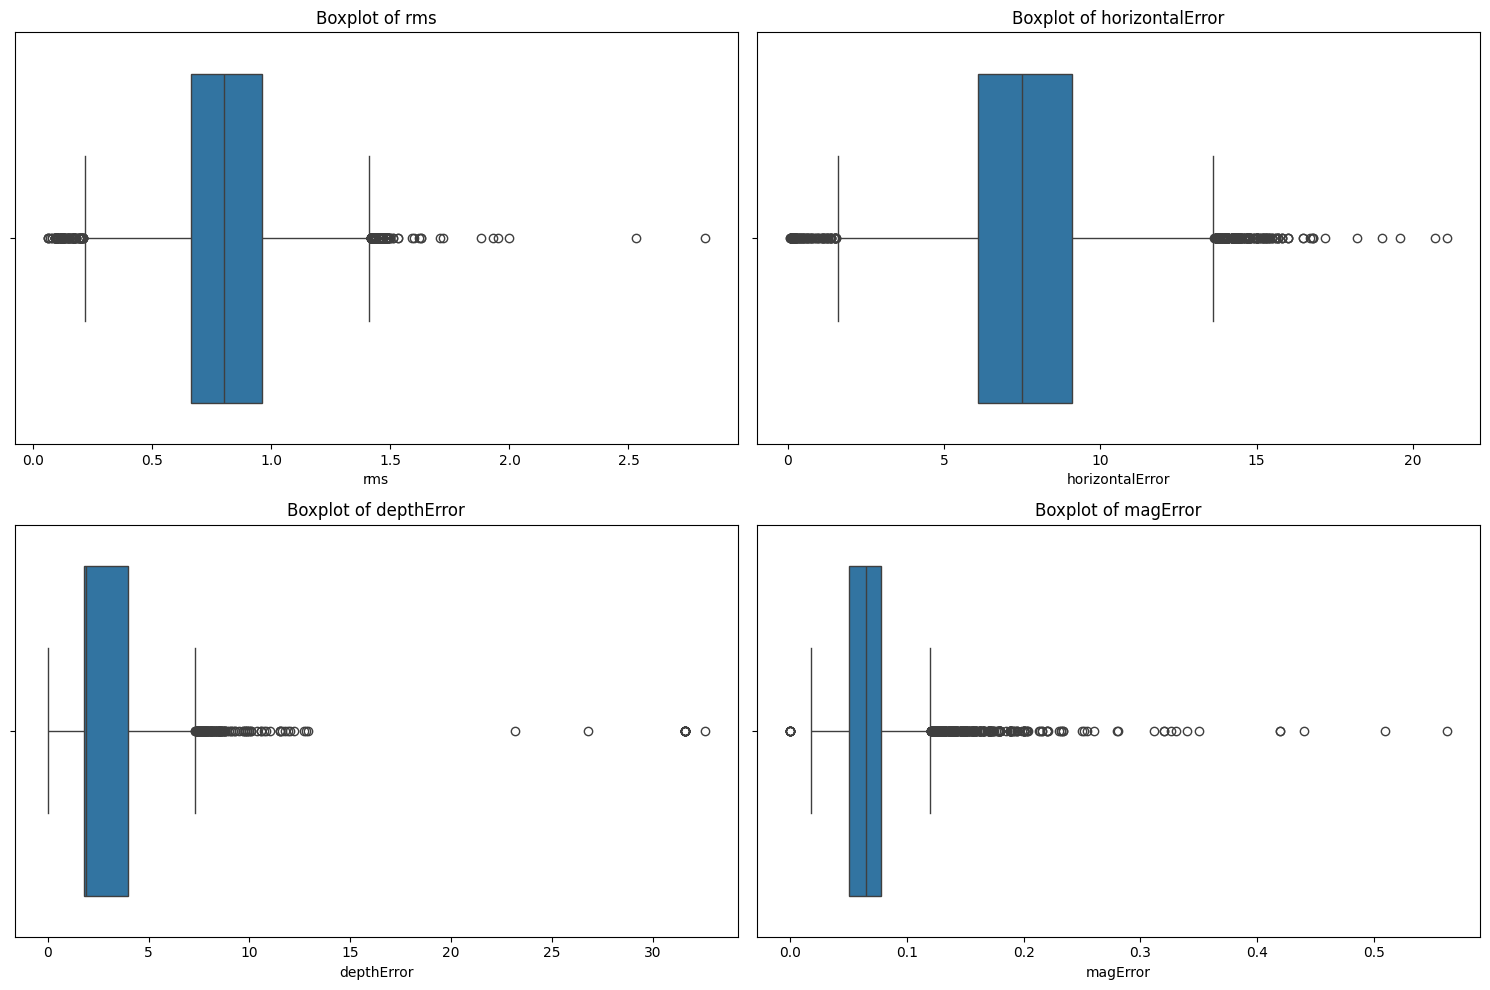

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for boxplotting
numerical_cols = [ 'rms', 'horizontalError', 'depthError', 'magError']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1) # Adjust subplot layout to 2x2
    sns.boxplot(x=df[col]) # Use df_new instead of analysis
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Descriptive Statistics After Winsorizing:


,rms,horizontalError,depthError,magError
count,17497.000000,17497.000000,17497.000000,17497.000000
mean,0.818836,7.598919,2.839780,0.064627
std,0.209936,2.133354,1.460572,0.019115
min,0.480000,3.800000,1.600000,0.033000
25%,0.660000,6.100000,1.800000,0.050000
50%,0.800000,7.500000,1.900000,0.065000
75%,0.960000,9.100000,4.000000,0.078000
max,1.240000,11.700000,6.035000,0.102000


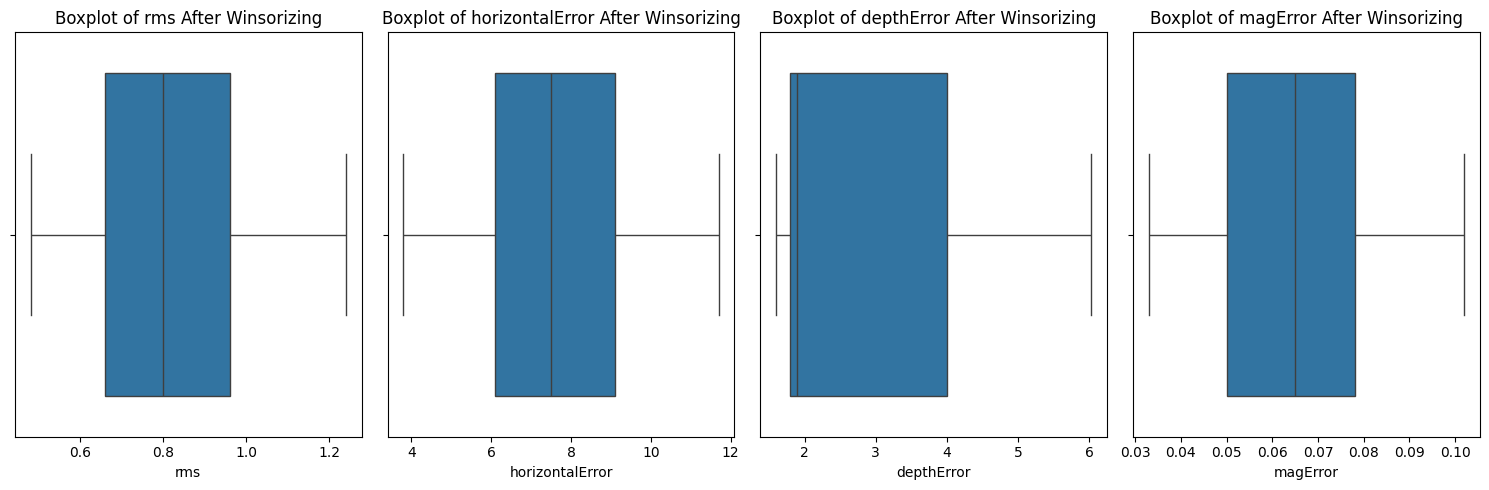

In [33]:
from scipy.stats.mstats import winsorize

# Winsorize the specified columns to handle outliers
columns_to_winsorize = ['rms', 'horizontalError', 'depthError', 'magError']
for col in columns_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.05, 0.05]) # Winsorize at the 5th and 95th percentile

# Display descriptive statistics to see the effect of winsorization
print("\nDescriptive Statistics After Winsorizing:")
display(df[columns_to_winsorize].describe())

# Optional: Visualize the boxplots again to see the effect of winsorization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_winsorize):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Winsorizing')
plt.tight_layout()
plt.show()

#Descriptive


In [34]:
# prompt: 5 highest earthquake

# Sort by 'Earthquake Magnitude' in descending order and select the top 5
top_5_earthquakes =df.sort_values(by='mag', ascending=False).head(5)

print("Top 5 Highest Magnitude Earthquakes:")
display(top_5_earthquakes)

Top 5 Highest Magnitude Earthquakes:


,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone
16418,2015-09-16 22:54:32.860000+00:00,-31.5729,-71.6744,22.44,8.3,mww,19.00000,1.02,"48 km W of Illapel, Chile",earthquake,4.700000,3.2,0.065819,Chile,South America,Ring of Fire
11677,2018-08-19 00:19:40.670000+00:00,-18.1125,-178.1530,600.00,8.2,mww,13.00000,0.79,"267 km E of Levuka, Fiji",earthquake,9.600000,1.9,0.045000,Wallis and Futuna,Oceania,Active Faults
13203,2017-09-08 04:49:19.180000+00:00,15.0222,-93.8993,47.39,8.2,mww,22.00000,1.22,"near the coast of Chiapas, Mexico",earthquake,6.200000,3.7,0.058000,Mexico,North America,Ring of Fire
6522,2021-07-29 06:15:49.188000+00:00,55.3635,-157.8876,35.00,8.2,mww,59.86638,0.95,Alaska Peninsula,earthquake,7.605025,1.6,0.065819,United States,North America,Ring of Fire
7364,2021-03-04 19:28:33.178000+00:00,-29.7228,-177.2794,28.93,8.1,mww,21.00000,0.69,"Kermadec Islands, New Zealand",earthquake,7.700000,3.3,0.034000,Tonga,Oceania,Ring of Fire


In [ ]:
earthquakes = df

#RESULTS EDA

### Frequent earthquake

In [35]:
# Ensure 'time' is in datetime format, handling potential errors
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Reset the index to make 'time' a column again (if it was set as index)
if 'time' not in df.columns:
    df.reset_index(inplace=True)

# Extract Year and Month
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month_name()

# Count occurrences for each Year-Month combination
year_month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Find the Year-Month with the maximum count
most_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmax()]

print("Year and Month with the most frequent earthquakes:")
print(f"Year: {most_frequent_year_month['Year']}")
print(f"Month: {most_frequent_year_month['Month']}")
print(f"Count: {most_frequent_year_month['Count']}")

# Optional: Display the top N most frequent Year-Month combinations
top_n = 10  # Change this to see more
print(f"\nTop {top_n} Year-Month combinations with most frequent earthquakes:")
print(year_month_counts.sort_values(by='Count', ascending=False).head(top_n))

Year and Month with the most frequent earthquakes:
Year: 2021.0
Month: March
Count: 360

Top 10 Year-Month combinations with most frequent earthquakes:
      Year      Month  Count
79  2021.0      March    360
73  2021.0     August    334
98  2023.0   December    281
75  2021.0   February    269
14  2016.0   December    240
11  2015.0  September    195
37  2018.0     August    194
91  2022.0      March    194
38  2018.0   December    189
46  2018.0    October    188


In [36]:
# list the year with earthquake frequency

import pandas as pd
# Reset the index to make 'Date' a column again # Removed: earthquakes.reset_index(inplace=True)

# Convert 'time' to datetime objects, handling potential errors
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Extract the year from the 'time' column
df['Year'] = df['time'].dt.year

# Group by year and count the number of earthquakes
yearly_frequency = df['Year'].value_counts().sort_index()

# Print the result
print("Earthquake Frequency by Year:")
yearly_frequency

Earthquake Frequency by Year:


,count
Year,
2015.0,1515
2016.0,1678
2017.0,1544
2018.0,1790
2019.0,1620
2020.0,1432
2021.0,2207
2022.0,1724
2023.0,1779


In [42]:
#less frequent earthquake in year and month

# Find the Year-Month with the minimum count
least_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmin()]

print("\nYear and Month with the least frequent earthquakes:")
print(f"Year: {least_frequent_year_month['Year']}")
print(f"Month: {least_frequent_year_month['Month']}")
print(f"Count: {least_frequent_year_month['Count']}")

bottom_n = 10
print(f"\nBottom {bottom_n} Year-Month combinations with least frequent earthquakes:")
print(year_month_counts.sort_values(by='Count', ascending=True).head(bottom_n))


Year and Month with the least frequent earthquakes:
Year: 2025.0
Month: May
Count: 41

Bottom 10 Year-Month combinations with least frequent earthquakes:
       Year     Month  Count
124  2025.0       May     41
10   2015.0   October     87
69   2020.0  November     89
20   2016.0       May     93
36   2018.0     April     95
30   2017.0      June     99
6    2015.0      June     99
51   2019.0  February    102
15   2016.0  February    103
65   2020.0      July    103


In [43]:
# Filter data for the years 2015-2025
earthquakes_2015_2025 = df[(df['Year'] >= 2015) & (df['Year'] <= 2025)]

# Count earthquakes per year in this range
yearly_counts_2015_2025 = earthquakes_2015_2025['Year'].value_counts().sort_index()

# Find the year with the minimum count
year_least_earthquakes = yearly_counts_2015_2025.idxmin()
count_least_earthquakes = yearly_counts_2015_2025.min()

print(f"\nFrom 2015 to 2024, the year with the least earthquakes is: {year_least_earthquakes}")
print(f"Number of earthquakes in {year_least_earthquakes}: {count_least_earthquakes}")

# Optional: Display counts for the 2015-2024 range
print("\nYearly earthquake counts (2015-2024):")
print(yearly_counts_2015_2025)


From 2015 to 2024, the year with the least earthquakes is: 2025.0
Number of earthquakes in 2025.0: 593

Yearly earthquake counts (2015-2024):
Year
2015.0    1515
2016.0    1678
2017.0    1544
2018.0    1790
2019.0    1620
2020.0    1432
2021.0    2207
2022.0    1724
2023.0    1779
2024.0    1504
2025.0     593
Name: count, dtype: int64


# EDA Visualization

### Yearly Trend

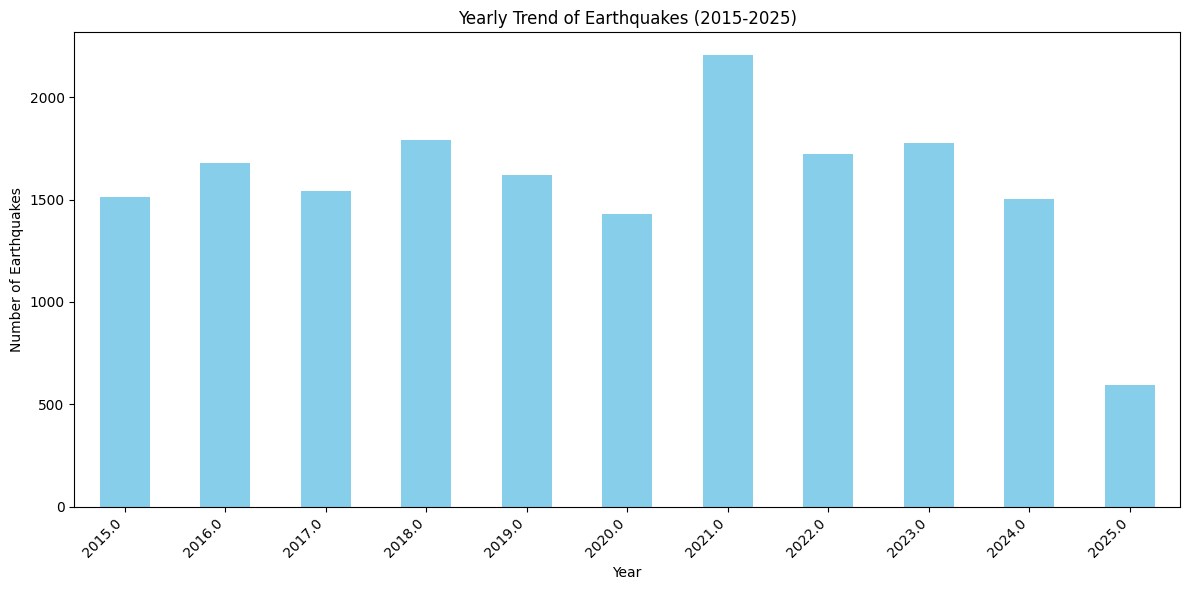

In [44]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
yearly_frequency.plot(kind='bar', color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Trend of Earthquakes (2015-2025)")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

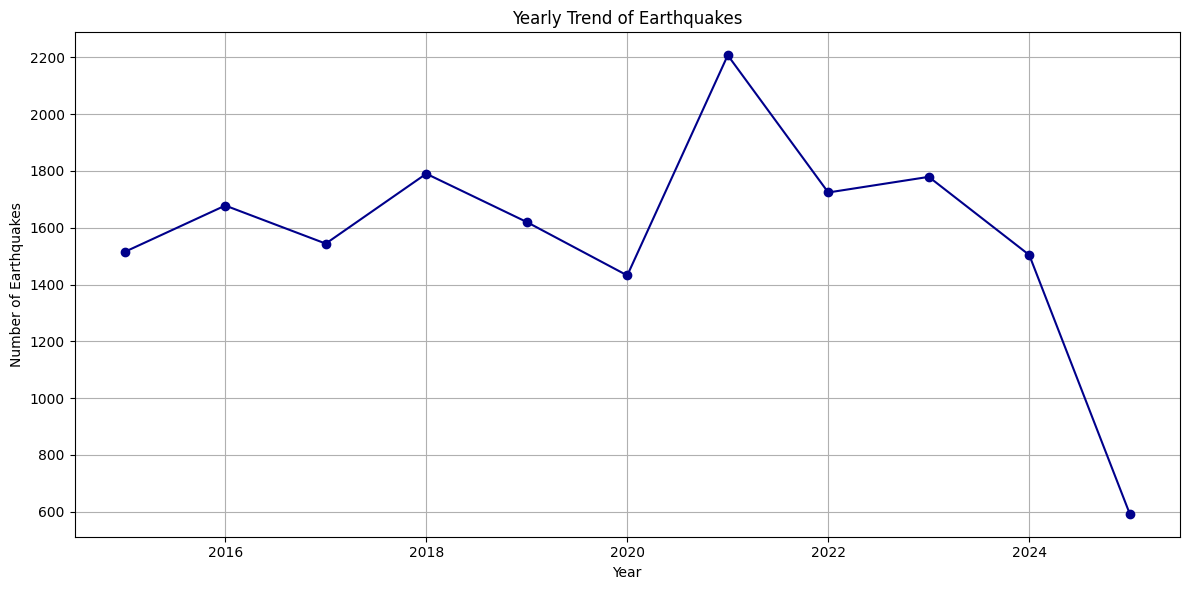

In [45]:
# time series graph using yearly

# Safely convert 'time' to datetime with day-first format
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Count earthquakes by year
yearly_counts = df['time'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='darkblue')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Trend of Earthquakes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# frequent earthquake year and month

# Count occurrences for each Year-Month combination
year_month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Find the Year-Month with the maximum count
most_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmax()]

print("Year and Month with the most frequent earthquakes:")
print(f"Year: {most_frequent_year_month['Year']}")
print(f"Month: {most_frequent_year_month['Month']}")
print(f"Count: {most_frequent_year_month['Count']}")

Year and Month with the most frequent earthquakes:
Year: 2021.0
Month: March
Count: 360


### Location of earthquake


Frequency of earthquakes in Land vs. Sea:
Location_Type
Land    12031
Sea      5466
Name: count, dtype: int64


/tmp/ipython-input-2627193099.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_type_counts.index, y=location_type_counts.values, palette='viridis')


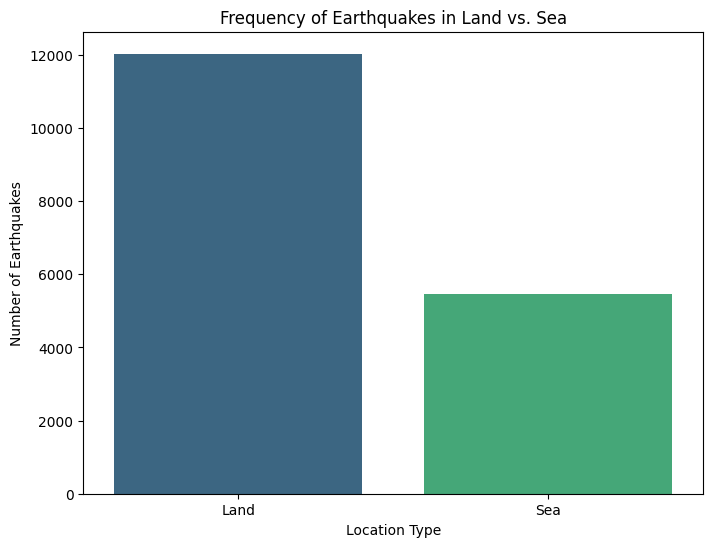

In [47]:
# Determine if an earthquake occurred on land or at sea based on location names
# This is a simplified approach. A more accurate method would involve using GIS data.
def determine_location_type(location):
    # Simple keywords to identify sea/ocean locations
    sea_keywords = ['Sea', 'Ocean', 'Gulf', 'Bay', 'Strait', 'Ridge', 'Rise', 'Trench', 'Basin', 'Island','Islands']
    for keyword in sea_keywords:
        if keyword in location:
            return 'Sea'
    return 'Land'

df['Location_Type'] = df['place'].apply(determine_location_type)

# Count the frequency of earthquakes in land and sea
location_type_counts = df['Location_Type'].value_counts()

print("\nFrequency of earthquakes in Land vs. Sea:")
print(location_type_counts)

# Visualize the frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=location_type_counts.index, y=location_type_counts.values, palette='viridis')
plt.xlabel("Location Type")
plt.ylabel("Number of Earthquakes")
plt.title("Frequency of Earthquakes in Land vs. Sea")
plt.show()


Top 10 Land Locations with Most Frequent Earthquakes:
place
Fiji region                      127
south of Tonga                    41
southwest of Africa               37
south of Africa                   37
Vanuatu region                    36
off the coast of Oregon           33
Off the coast of Aisen, Chile     25
Owen Fracture Zone region         23
6 km SW of Volcano, Hawaii        23
Chagos Archipelago region         20
Name: count, dtype: int64

Top 10 Sea Locations with Most Frequent Earthquakes:
place
South Sandwich Islands region       878
Kermadec Islands region             456
southeast of the Loyalty Islands    266
Kermadec Islands, New Zealand       242
southern Mid-Atlantic Ridge         201
south of the Fiji Islands           198
south of the Kermadec Islands       179
Pacific-Antarctic Ridge             173
Izu Islands, Japan region           157
northern Mid-Atlantic Ridge         143
Name: count, dtype: int64


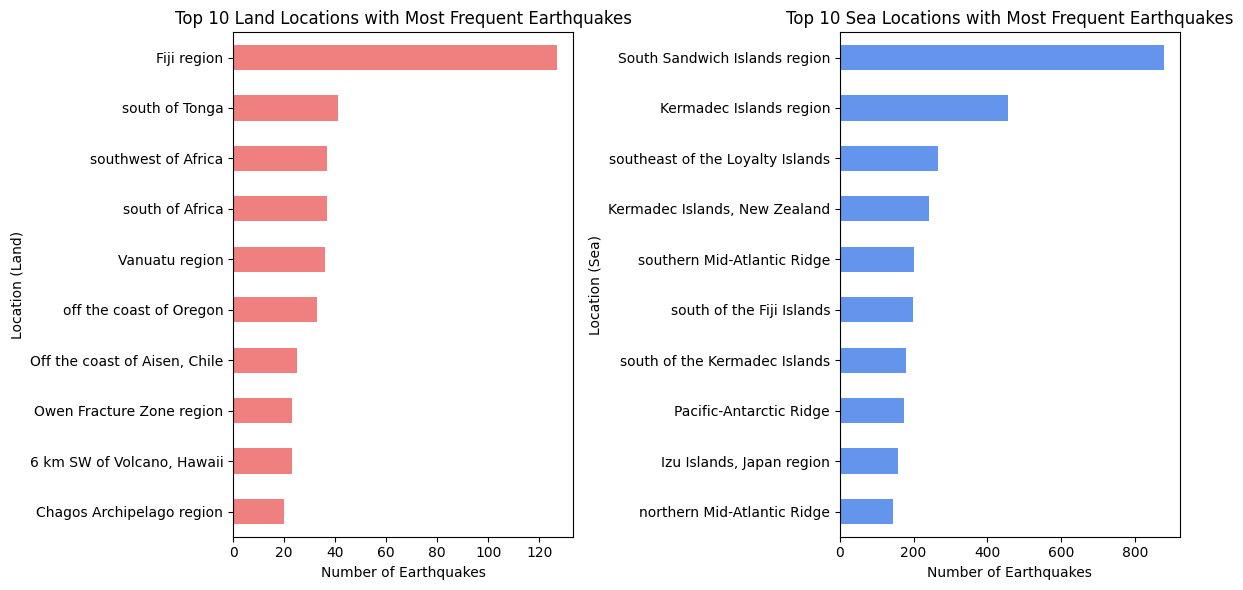

In [48]:
# Analyze the top cities for each location type
top_land_cities = df[df['Location_Type'] == 'Land']['place'].value_counts().head(10)
top_sea_locations = df[df['Location_Type'] == 'Sea']['place'].value_counts().head(10)

print("\nTop 10 Land Locations with Most Frequent Earthquakes:")
print(top_land_cities)

print("\nTop 10 Sea Locations with Most Frequent Earthquakes:")
print(top_sea_locations)

# Visualize the top land and sea locations separately
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_land_cities.plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location (Land)')
plt.title('Top 10 Land Locations with Most Frequent Earthquakes')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_sea_locations.plot(kind='barh', color='cornflowerblue')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location (Sea)')
plt.title('Top 10 Sea Locations with Most Frequent Earthquakes')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

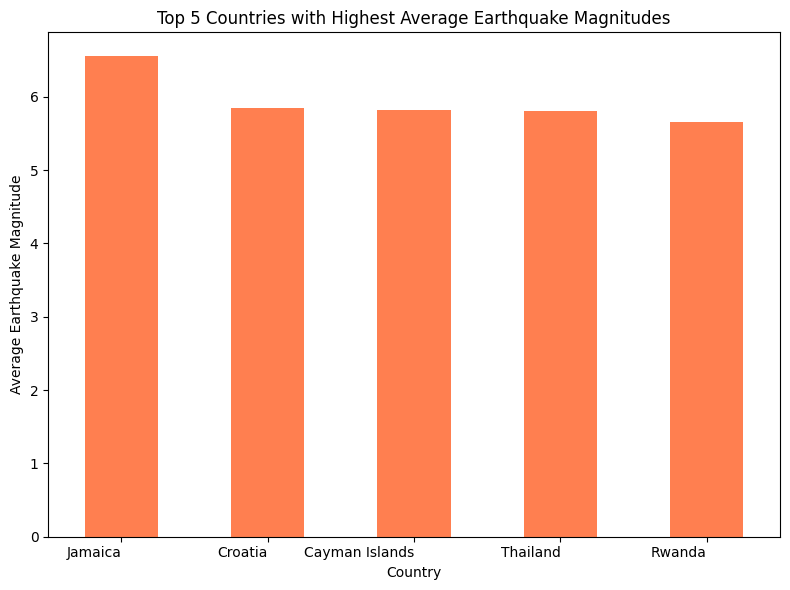

,mag
Country,
Jamaica,6.550000
Croatia,5.850000
Cayman Islands,5.814286
Thailand,5.800000
Rwanda,5.650000


In [49]:
 #3. Bar chart of top 5 countries with highest average magnitudes
top_5_countries = df.groupby('Country')['mag'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
top_5_countries.plot(kind='bar', color='coral')
plt.xlabel('Country')
plt.ylabel('Average Earthquake Magnitude')
plt.title('Top 5 Countries with Highest Average Earthquake Magnitudes')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

top_5_countries

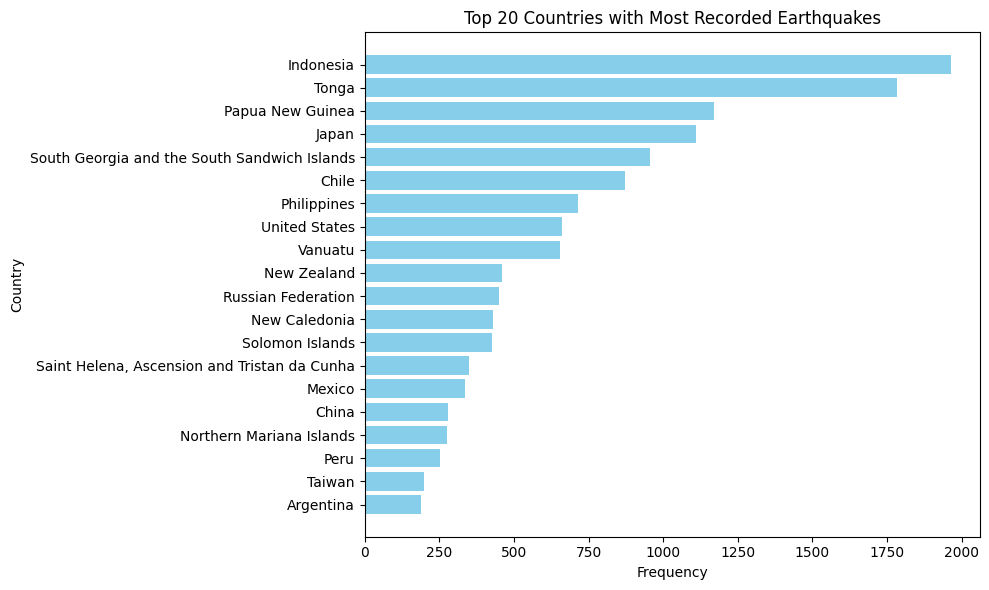

In [50]:
# horizontal histogram of frequency most earthquakes
country_counts = df['Country'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 20 Countries with Most Recorded Earthquakes')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

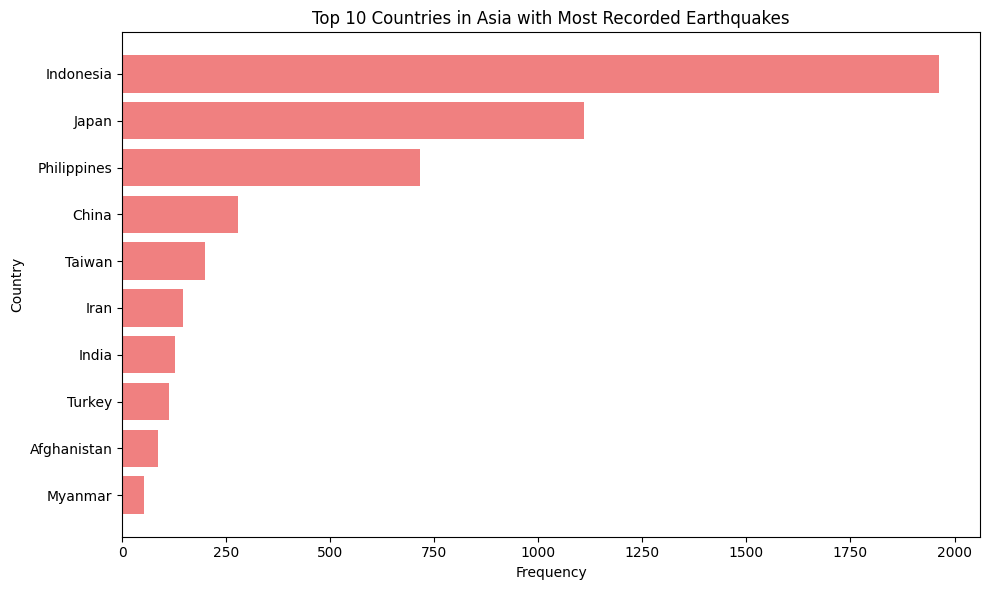

In [52]:
# top 20 frequency of earthquake in asia in horizontal histogram

import matplotlib.pyplot as plt
import seaborn as sns
# Filter data for Asia (approximation based on countries)
asia_countries = ['China', 'Japan', 'Indonesia', 'India', 'Philippines', 'Iran', 'Turkey', 'Pakistan', 'Nepal', 'Myanmar', 'Bangladesh', 'Thailand', 'Vietnam', 'Malaysia', 'North Korea', 'South Korea', 'Taiwan', 'Syria', 'Iraq', 'Afghanistan']
earthquakes_asia = df[df['Country'].isin(asia_countries)]

# Get the frequency of earthquakes by country in Asia
asia_country_counts = earthquakes_asia['Country'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(asia_country_counts.index, asia_country_counts.values, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 10 Countries in Asia with Most Recorded Earthquakes')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

#### Magnitude

In [54]:
# Top 5  highest magnitude earthquake

# Sort by 'mag' in descending order and select the top 5
top_5_earthquakes = df.sort_values(by='mag', ascending=False).head(5)

print("Top 10 Highest Magnitude Earthquakes:")
display(top_5_earthquakes)

Top 10 Highest Magnitude Earthquakes:


,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone,Year,Month,Location_Type
16418,2015-09-16 22:54:32.860000+00:00,-31.5729,-71.6744,22.44,8.3,mww,19.00000,1.02,"48 km W of Illapel, Chile",earthquake,4.700000,3.2,0.065819,Chile,South America,Ring of Fire,2015.0,September,Land
11677,2018-08-19 00:19:40.670000+00:00,-18.1125,-178.1530,600.00,8.2,mww,13.00000,0.79,"267 km E of Levuka, Fiji",earthquake,9.600000,1.9,0.045000,Wallis and Futuna,Oceania,Active Faults,2018.0,August,Land
13203,2017-09-08 04:49:19.180000+00:00,15.0222,-93.8993,47.39,8.2,mww,22.00000,1.22,"near the coast of Chiapas, Mexico",earthquake,6.200000,3.7,0.058000,Mexico,North America,Ring of Fire,2017.0,September,Land
6522,2021-07-29 06:15:49.188000+00:00,55.3635,-157.8876,35.00,8.2,mww,59.86638,0.95,Alaska Peninsula,earthquake,7.605025,1.6,0.065819,United States,North America,Ring of Fire,2021.0,July,Land
7364,2021-03-04 19:28:33.178000+00:00,-29.7228,-177.2794,28.93,8.1,mww,21.00000,0.69,"Kermadec Islands, New Zealand",earthquake,7.700000,3.3,0.034000,Tonga,Oceania,Ring of Fire,2021.0,March,Sea


In [55]:
# cities with frequent earthquake

import matplotlib.pyplot as plt
import seaborn as sns
# Group by City and count the number of earthquakes
city_earthquake_counts = df['place'].value_counts().head(10)
city_earthquake_counts

,count
place,
South Sandwich Islands region,878
Kermadec Islands region,456
southeast of the Loyalty Islands,266
"Kermadec Islands, New Zealand",242
southern Mid-Atlantic Ridge,201
south of the Fiji Islands,198
south of the Kermadec Islands,179
Pacific-Antarctic Ridge,173
"Izu Islands, Japan region",157


In [56]:
# List of magnitude more than 7.0

# Filter for earthquakes with magnitude greater than 7.0
earthquakes_above_7 = df[df['mag'] > 7.0]

# Print the list of earthquakes with magnitude greater than 7.0
print("\nEarthquakes with Magnitude greater than 7.0:")
display(earthquakes_above_7)


Earthquakes with Magnitude greater than 7.0:


,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Continental,Classification Zone,Year,Month,Location_Type
32,2025-05-02 12:58:26.014000+00:00,-56.8094,-68.1019,10.000,7.4,mww,20.0,0.75,2025 Drake Passage Earthquake,earthquake,7.58,1.600,0.038000,Argentina,South America,Active Faults,2025.0,May,Land
209,2025-03-28 06:20:52.715000+00:00,22.0110,95.9363,10.000,7.7,mww,24.0,0.89,"2025 Mandalay, Burma (Myanmar) Earthquake",earthquake,7.63,1.719,0.033000,Myanmar,Asia,Active Faults,2025.0,March,Land
404,2025-02-08 23:23:14.697000+00:00,17.6506,-82.3950,14.326,7.6,mww,18.0,0.62,"210 km SSW of George Town, Cayman Islands",earthquake,6.99,3.216,0.033000,Cayman Islands,North America,Active Faults,2025.0,February,Sea
560,2025-01-07 01:05:16.734000+00:00,28.6036,87.3781,10.000,7.1,mww,17.0,0.56,2025 Southern Tibetan Plateau Earthquake,earthquake,8.15,1.740,0.039000,China,Asia,Active Faults,2025.0,January,Land
659,2024-12-17 01:47:25.741000+00:00,-17.6914,168.0842,54.372,7.3,mww,18.0,0.64,"24 km WNW of Port-Vila, Vanuatu",earthquake,6.75,4.068,0.036000,Vanuatu,Oceania,Ring of Fire,2024.0,December,Land
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16987,2015-05-07 07:10:19.590000+00:00,-7.2175,154.5567,10.000,7.1,mww,11.0,0.70,"143 km SW of Panguna, Papua New Guinea",earthquake,7.10,1.700,0.065819,Papua New Guinea,Oceania,Ring of Fire,2015.0,May,Land
17008,2015-05-05 01:44:06.380000+00:00,-5.4624,151.8751,55.000,7.5,mww,22.0,1.02,"131 km SSW of Kokopo, Papua New Guinea",earthquake,6.10,1.900,0.065819,Papua New Guinea,Oceania,Ring of Fire,2015.0,May,Land
17068,2015-04-25 06:11:25.950000+00:00,28.2305,84.7314,8.220,7.8,mww,12.0,0.96,"67 km NNE of Bharatpur, Nepal",earthquake,7.30,2.900,0.065819,Nepal,Asia,Active Faults,2015.0,April,Land
17158,2015-03-29 23:48:31.010000+00:00,-4.7294,152.5623,41.000,7.5,mww,19.0,1.24,"53 km SE of Kokopo, Papua New Guinea",earthquake,7.00,1.800,0.065819,Papua New Guinea,Oceania,Ring of Fire,2015.0,March,Land


In [57]:
# display country, date, magnitude and city with highest magnitude

most_powerful_earthquake = df.loc[df['mag'].idxmax()]
print(f"Country: {most_powerful_earthquake['Country']}")
print(f"Date: {most_powerful_earthquake['time']}")
print(f"Magnitude: {most_powerful_earthquake['mag']}")
print(f"City: {most_powerful_earthquake['place']}")

Country: Chile
Date: 2015-09-16 22:54:32.860000+00:00
Magnitude: 8.3
City: 48 km W of Illapel, Chile



Frequency of earthquakes in Classification Zone:
 Classification Zone
Ring of Fire     11744
Active Faults     5753
Name: count, dtype: int64


/tmp/ipython-input-2310143029.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ring_of_fire_counts.index, y=ring_of_fire_counts.values, palette='viridis')


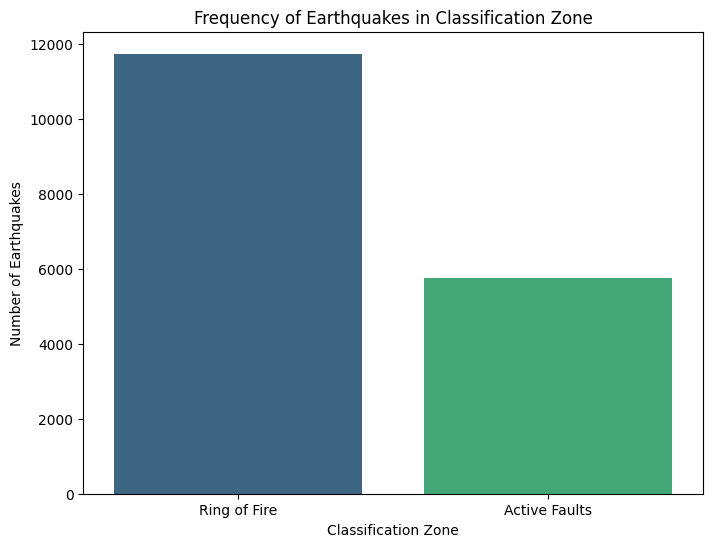

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of earthquakes in the Ring of Fire Zone
ring_of_fire_counts = df[' Classification Zone'].value_counts()

print("\nFrequency of earthquakes in Classification Zone:")
print(ring_of_fire_counts)

# Visualize the frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=ring_of_fire_counts.index, y=ring_of_fire_counts.values, palette='viridis')
plt.xlabel("Classification Zone")
plt.ylabel("Number of Earthquakes")
plt.title("Frequency of Earthquakes in Classification Zone")

# Use the actual classification zone names for the x-axis labels
plt.xticks(ticks=[0, 1], labels=[ 'Ring of Fire', 'Active Faults'])

plt.show()


Frequency of earthquakes in Classification Zone:
 Classification Zone
Ring of Fire     11744
Active Faults     5753
Name: count, dtype: int64


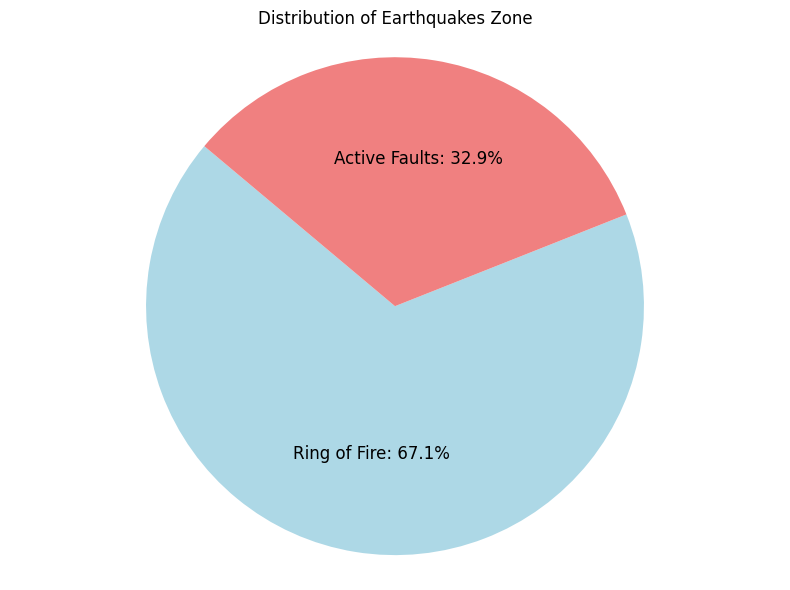

In [60]:
import matplotlib.pyplot as plt

# Count the frequency of earthquakes in the Ring of Fire Zone
ring_of_fire_counts = df[' Classification Zone'].value_counts()

print("\nFrequency of earthquakes in Classification Zone:")
print(ring_of_fire_counts)

# Prepare data
labels = ring_of_fire_counts.index
sizes = ring_of_fire_counts.values
colors = ['lightblue', 'lightcoral']

# Create the pie chart with labels inside
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,  # We'll add labels manually
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Customize each label inside the pie slice
for i, a in enumerate(autotexts):
    a.set_text(f"{labels[i]}: {a.get_text()}")  # Example: "Yes: 75.0%"

plt.title('Distribution of Earthquakes Zone')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


Frequency of earthquakes by Continent:
Continental
Oceania          6090
Asia             5288
South America    2735
North America    1582
Europe            873
Africa            815
Antarctica        114
Name: count, dtype: int64


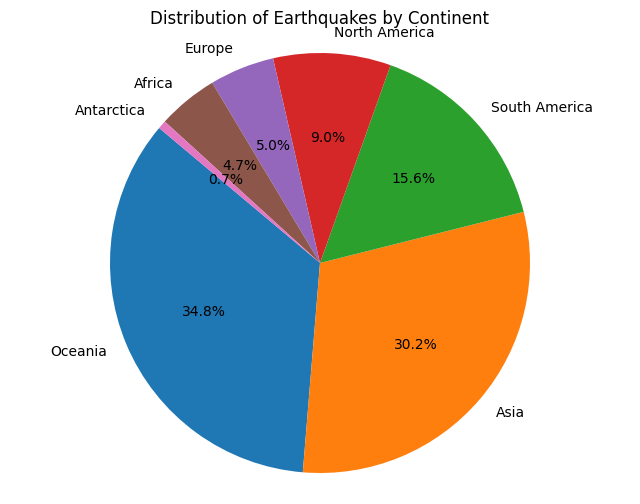

In [61]:
import matplotlib.pyplot as plt

# Count the frequency of earthquakes by continent
continent_counts = df['Continental'].value_counts()

print("\nFrequency of earthquakes by Continent:")
print(continent_counts)

# Visualize the frequency using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Earthquakes by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

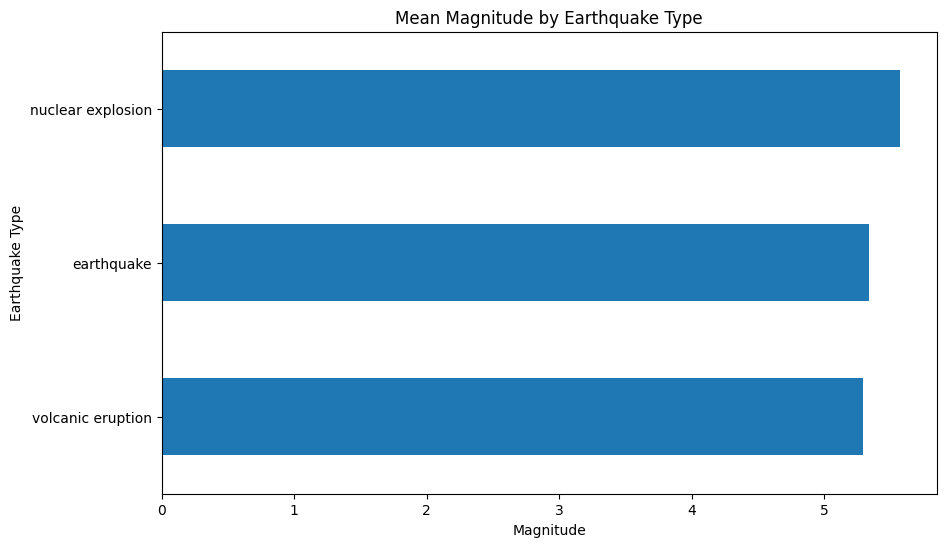

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of the mean magnitude for each earthquake type
mean_mag_by_type = df.groupby('type')['mag'].mean().sort_values()
mean_mag_by_type.plot(kind='barh', figsize=(10,6))
plt.title('Mean Magnitude by Earthquake Type')
plt.xlabel('Magnitude')
plt.ylabel('Earthquake Type')
plt.show()

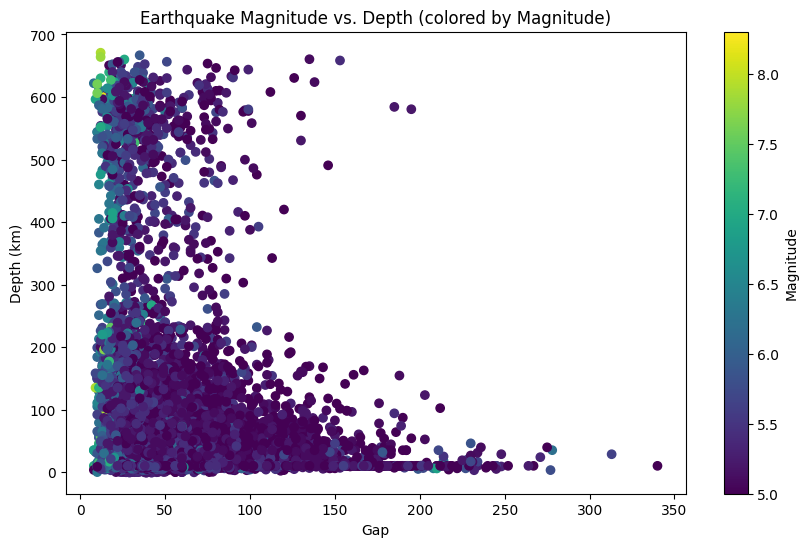

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of Magnitude vs. Depth, colored by Impact Score
plt.figure(figsize=(10, 6))
plt.scatter(df['gap'], df['depth'], c=df['mag'], cmap='viridis')
plt.xlabel('Gap')
plt.ylabel('Depth (km)')
plt.title('Earthquake Magnitude vs. Depth (colored by Magnitude)')
plt.colorbar(label='Magnitude')
plt.show()

# Data Transformation

In [64]:
#Label encoded fault proximity
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'fault_proximity' column
df['Continent_encoded'] = label_encoder.fit_transform(df['Continental'])

df.drop('Continental', axis=1, inplace=True)
print("Label encoding mapping for 'Continent':")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label} → {code}")


Label encoding mapping for 'Continent':
Africa → 0
Antarctica → 1
Asia → 2
Europe → 3
North America → 4
Oceania → 5
South America → 6


In [65]:
df

,time,latitude,longitude,depth,mag,magType,gap,rms,place,type,horizontalError,depthError,magError,Country,Classification Zone,Year,Month,Location_Type,Continent_encoded
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,mww,42.00000,0.48,"117 km WNW of Höfn, Iceland",earthquake,5.10,1.771,0.083000,Iceland,Active Faults,2025.0,May,Land,3
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,mb,78.00000,0.59,Kermadec Islands region,earthquake,10.68,3.974,0.074000,Tonga,Ring of Fire,2025.0,May,Sea,5
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,mww,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,1.822,0.053000,Taiwan,Ring of Fire,2025.0,May,Land,2
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,mb,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.80,1.787,0.033000,Taiwan,Ring of Fire,2025.0,May,Land,2
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,mww,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,3.521,0.083000,Chile,Ring of Fire,2025.0,May,Land,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,mwr,76.00000,1.24,"233 km W of Port McNeill, Canada",earthquake,6.00,1.800,0.065819,Canada,Ring of Fire,2015.0,January,Land,4
17493,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,mwc,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,1.900,0.065819,Yemen,Active Faults,2015.0,January,Sea,2
17494,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,mwc,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,1.900,0.065819,Yemen,Active Faults,2015.0,January,Sea,2
17495,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,mw,271.00000,0.48,"128 km W of Ferndale, California",earthquake,3.80,6.035,0.065819,United States,Ring of Fire,2015.0,January,Land,4


In [67]:
# Encode the zone classification
le = LabelEncoder()
df['Zone Classification'] = le.fit_transform(df[' Classification Zone'])
##print("Label encoding mapping for 'Zone Class':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")

Active Faults → 0
Ring of Fire → 1


In [ ]:
# Encode the zone classification
le = LabelEncoder()
df['Types of earthquake'] = le.fit_transform(df['type'])
df.drop('type', axis=1, inplace=True)
##print("Label encoding mapping for 'Zone Class':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")


earthquake → 0
nuclear explosion → 1
volcanic eruption → 2


In [68]:
# Encode the magtype classification
le = LabelEncoder()
df['Magnitude Type'] = le.fit_transform(df['magType'])
df.drop('magType', axis=1, inplace=True)
##print("Label encoding mapping for 'Zone Class':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")


mb → 0
ml → 1
ml(texnet) → 2
ms_20 → 3
mw → 4
mwb → 5
mwc → 6
mwp → 7
mwr → 8
mww → 9


In [75]:
# Encode the typw
le = LabelEncoder()
df['Type'] = le.fit_transform(df['type'])
##print("Label encoding mapping for 'Zone Class':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")

earthquake → 0
nuclear explosion → 1
volcanic eruption → 2


In [76]:
df

,time,latitude,longitude,depth,mag,gap,rms,place,type,horizontalError,...,magError,Country,Classification Zone,Year,Month,Location_Type,Continent_encoded,Zone Classification,Magnitude Type,Type
0,2025-05-05 21:14:02.950000+00:00,64.6302,-17.498100,10.000,5.30,42.00000,0.48,"117 km WNW of Höfn, Iceland",earthquake,5.10,...,0.083000,Iceland,Active Faults,2025.0,May,Land,3,0,9,0
1,2025-05-05 13:15:47.116000+00:00,-28.2867,-176.561700,12.659,5.00,78.00000,0.59,Kermadec Islands region,earthquake,10.68,...,0.074000,Tonga,Ring of Fire,2025.0,May,Sea,5,1,0,0
2,2025-05-05 10:53:27.776000+00:00,23.9090,121.967100,27.000,5.60,34.00000,0.90,"37 km ESE of Hualien City, Taiwan",earthquake,4.76,...,0.053000,Taiwan,Ring of Fire,2025.0,May,Land,2,1,9,0
3,2025-05-05 10:09:59.032000+00:00,23.9405,122.020100,10.000,5.30,34.00000,0.83,"42 km E of Hualien City, Taiwan",earthquake,3.80,...,0.033000,Taiwan,Ring of Fire,2025.0,May,Land,2,1,0,0
4,2025-05-05 09:46:46.882000+00:00,-29.4675,-71.924200,22.933,5.10,71.00000,0.98,"78 km NW of Coquimbo, Chile",earthquake,4.03,...,0.083000,Chile,Ring of Fire,2025.0,May,Land,6,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,2015-01-02 10:15:34.380000+00:00,50.8632,-130.365400,10.000,5.40,76.00000,1.24,"233 km W of Port McNeill, Canada",earthquake,6.00,...,0.065819,Canada,Ring of Fire,2015.0,January,Land,4,1,8,0
17493,2015-01-02 08:25:52.660000+00:00,6.4488,60.298500,10.000,5.40,56.00000,1.03,Carlsberg Ridge,earthquake,10.90,...,0.065819,Yemen,Active Faults,2015.0,January,Sea,2,0,6,0
17494,2015-01-02 08:21:55.900000+00:00,6.5739,60.365300,10.000,5.50,56.00000,0.88,Carlsberg Ridge,earthquake,5.80,...,0.065819,Yemen,Active Faults,2015.0,January,Sea,2,0,6,0
17495,2015-01-01 12:16:14.570000+00:00,40.4420,-125.774667,23.900,5.36,271.00000,0.48,"128 km W of Ferndale, California",earthquake,3.80,...,0.065819,United States,Ring of Fire,2015.0,January,Land,4,1,4,0


In [77]:
analysis = df[['longitude', 'latitude','depth', 'mag',  'gap', 'rms', 'horizontalError', 'depthError', 'magError', 'Continent_encoded', 'Zone Classification',   'Type',  'Magnitude Type']]
display(analysis.head())

,longitude,latitude,depth,mag,gap,rms,horizontalError,depthError,magError,Continent_encoded,Zone Classification,Type,Magnitude Type
0,-17.4981,64.6302,10.000,5.3,42.0,0.48,5.10,1.771,0.083,3,0,0,9
1,-176.5617,-28.2867,12.659,5.0,78.0,0.59,10.68,3.974,0.074,5,1,0,0
2,121.9671,23.9090,27.000,5.6,34.0,0.90,4.76,1.822,0.053,2,1,0,9
3,122.0201,23.9405,10.000,5.3,34.0,0.83,3.80,1.787,0.033,2,1,0,0
4,-71.9242,-29.4675,22.933,5.1,71.0,0.98,4.03,3.521,0.083,6,1,0,9


In [78]:
analysis.describe()

,longitude,latitude,depth,mag,gap,rms,horizontalError,depthError,magError,Continent_encoded,Zone Classification,Type,Magnitude Type
count,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000
mean,31.923169,-3.252000,52.992789,5.333634,59.866380,0.818836,7.598919,2.839780,0.064627,3.800480,0.671201,0.006458,5.082300
std,123.874337,30.598138,103.533028,0.404520,34.249738,0.209936,2.133354,1.460572,0.019115,1.731002,0.469790,0.112712,4.391958
min,-179.989700,-71.733900,-1.010000,5.000000,8.000000,0.480000,3.800000,1.600000,0.033000,0.000000,0.000000,0.000000,0.000000
25%,-74.417300,-22.928000,10.000000,5.100000,35.000000,0.660000,6.100000,1.800000,0.050000,2.000000,0.000000,0.000000,0.000000
50%,87.465900,-5.837100,11.990000,5.200000,53.000000,0.800000,7.500000,1.900000,0.065000,5.000000,1.000000,0.000000,9.000000
75%,142.121200,18.297200,45.480000,5.500000,76.000000,0.960000,9.100000,4.000000,0.078000,5.000000,1.000000,0.000000,9.000000
max,179.998100,87.386000,670.810000,8.300000,340.000000,1.240000,11.700000,6.035000,0.102000,6.000000,1.000000,2.000000,9.000000


Spearman Correlation Matrix:
                     longitude  latitude     depth       mag       gap  \
longitude             1.000000  0.178089  0.072227 -0.034776 -0.135061   
latitude              0.178089  1.000000  0.018994 -0.001125 -0.098254   
depth                 0.072227  0.018994  1.000000  0.016264 -0.172380   
mag                  -0.034776 -0.001125  0.016264  1.000000 -0.383962   
gap                  -0.135061 -0.098254 -0.172380 -0.383962  1.000000   
rms                  -0.060260 -0.044407  0.103311  0.099767 -0.057230   
horizontalError      -0.066126 -0.393190 -0.013245 -0.104107  0.172808   
depthError            0.093589  0.041110  0.618373 -0.269460  0.138351   
magError              0.005227 -0.313940 -0.101238 -0.184515  0.186781   
Continent_encoded    -0.218503 -0.555750  0.068609  0.026201  0.141254   
Zone Classification   0.067945  0.004344  0.225016  0.021696  0.115557   
Type                 -0.065620  0.052189 -0.103808  0.017893 -0.045695   
Magnitude

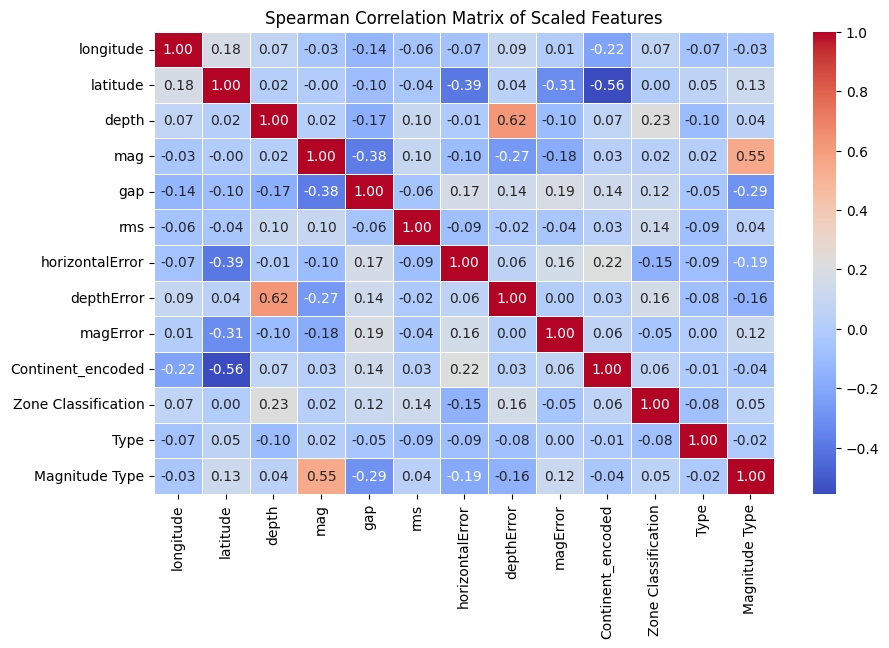

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman correlation matrix
correlation_matrix = analysis.corr(method='spearman')

# Print the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Scaled Features')
plt.show()

# Feature Engineering


In [82]:
analysis.head()

,longitude,latitude,depth,mag,gap,rms,horizontalError,depthError,magError,Continent_encoded,Zone Classification,Type,Magnitude Type
0,-17.4981,64.6302,10.000,5.3,42.0,0.48,5.10,1.771,0.083,3,0,0,9
1,-176.5617,-28.2867,12.659,5.0,78.0,0.59,10.68,3.974,0.074,5,1,0,0
2,121.9671,23.9090,27.000,5.6,34.0,0.90,4.76,1.822,0.053,2,1,0,9
3,122.0201,23.9405,10.000,5.3,34.0,0.83,3.80,1.787,0.033,2,1,0,0
4,-71.9242,-29.4675,22.933,5.1,71.0,0.98,4.03,3.521,0.083,6,1,0,9


In [83]:
correlation_matrix

,longitude,latitude,depth,mag,gap,rms,horizontalError,depthError,magError,Continent_encoded,Zone Classification,Type,Magnitude Type
longitude,1.000000,0.178089,0.072227,-0.034776,-0.135061,-0.060260,-0.066126,0.093589,0.005227,-0.218503,0.067945,-0.065620,-0.033436
latitude,0.178089,1.000000,0.018994,-0.001125,-0.098254,-0.044407,-0.393190,0.041110,-0.313940,-0.555750,0.004344,0.052189,0.129080
depth,0.072227,0.018994,1.000000,0.016264,-0.172380,0.103311,-0.013245,0.618373,-0.101238,0.068609,0.225016,-0.103808,0.044315
mag,-0.034776,-0.001125,0.016264,1.000000,-0.383962,0.099767,-0.104107,-0.269460,-0.184515,0.026201,0.021696,0.017893,0.547873
gap,-0.135061,-0.098254,-0.172380,-0.383962,1.000000,-0.057230,0.172808,0.138351,0.186781,0.141254,0.115557,-0.045695,-0.290251
rms,-0.060260,-0.044407,0.103311,0.099767,-0.057230,1.000000,-0.086078,-0.023121,-0.042486,0.026939,0.141747,-0.087063,0.036990
horizontalError,-0.066126,-0.393190,-0.013245,-0.104107,0.172808,-0.086078,1.000000,0.057194,0.159645,0.218993,-0.154727,-0.091721,-0.193790
depthError,0.093589,0.041110,0.618373,-0.269460,0.138351,-0.023121,0.057194,1.000000,0.003852,0.032678,0.162955,-0.081112,-0.157935
magError,0.005227,-0.313940,-0.101238,-0.184515,0.186781,-0.042486,0.159645,0.003852,1.000000,0.059541,-0.048459,0.002256,0.115995
Continent_encoded,-0.218503,-0.555750,0.068609,0.026201,0.141254,0.026939,0.218993,0.032678,0.059541,1.000000,0.061931,-0.012147,-0.035116


In [84]:
threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix) >= threshold].index.tolist()

# Remove the target from the list
selected_features.remove('Zone Classification')

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
['longitude', 'latitude', 'depth', 'mag', 'gap', 'rms', 'horizontalError', 'depthError', 'magError', 'Continent_encoded', 'Type', 'Magnitude Type']


In [87]:
selected_features[:5]

['longitude', 'latitude', 'depth', 'mag', 'gap']

In [88]:
analysis['Zone Classification']

,Zone Classification
0,0
1,1
2,1
3,1
4,1
...,...
17492,1
17493,0
17494,0
17495,1


# MACHINE LEARNING


## Split and Train

In [89]:
X = analysis[selected_features]
y = analysis['Zone Classification']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X-train: ', X_train.shape)
print('y-train: ', y_train.shape)
print()
print('X-test: ', X_test.shape)
print('y-test: ', y_test.shape)

X-train:  (13997, 12)
y-train:  (13997,)

X-test:  (3500, 12)
y-test:  (3500,)


#Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred_rf= rf_classifier.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(result_rf)

classification_result_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:",)
print (classification_result_rf)

result2 = accuracy_score(y_test,y_pred_rf)
print("Accuracy Random Forest:",result2)

Confusion Matrix:
[[1080   39]
 [  16 2365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1119
           1       0.98      0.99      0.99      2381

    accuracy                           0.98      3500
   macro avg       0.98      0.98      0.98      3500
weighted avg       0.98      0.98      0.98      3500

Accuracy Random Forest: 0.9842857142857143


# XGBoost

In [94]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [95]:
# Evaluate model
result_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix of XGBoost:")
print(result_xgb)

classification_result_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report of XGBoost:",)
print (classification_result_xgb)

result2_xgb = accuracy_score(y_test,y_pred_xgb)
print("Accuracy for XGboost:",result2_xgb)

Confusion Matrix of XGBoost:
[[1097   22]
 [  18 2363]]
Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1119
           1       0.99      0.99      0.99      2381

    accuracy                           0.99      3500
   macro avg       0.99      0.99      0.99      3500
weighted avg       0.99      0.99      0.99      3500

Accuracy for XGboost: 0.9885714285714285


# Model Evaluation

In [96]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test, y_pred_rf (from Random Forest), and y_pred_xgb (from XGBoost) are available from previous steps

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, rf_classifier.predict(X_test))
precision_rf = precision_score(y_test, rf_classifier.predict(X_test))
recall_rf = recall_score(y_test, rf_classifier.predict(X_test))
f1_rf = f1_score(y_test, rf_classifier.predict(X_test))

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, xgb_classifier.predict(X_test))
precision_xgb = precision_score(y_test, xgb_classifier.predict(X_test))
recall_xgb = recall_score(y_test, xgb_classifier.predict(X_test))
f1_xgb = f1_score(y_test, xgb_classifier.predict(X_test))


# Create a comparison table
results = {
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
}

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T

# Optionally round the values for better readability
results_df = results_df.round(5)

# Display the table
print("Model Comparison (Classification Metrics):")
display(results_df)

Model Comparison (Classification Metrics):


,Accuracy,Precision,Recall,F1-score
Random Forest,0.98429,0.98378,0.99328,0.98851
XGBoost,0.98857,0.99078,0.99244,0.99161


Confusion Matrix for Random Forest:
[[1080   39]
 [  16 2365]]

Confusion Matrix for XGBoost:
[[1097   22]
 [  18 2363]]


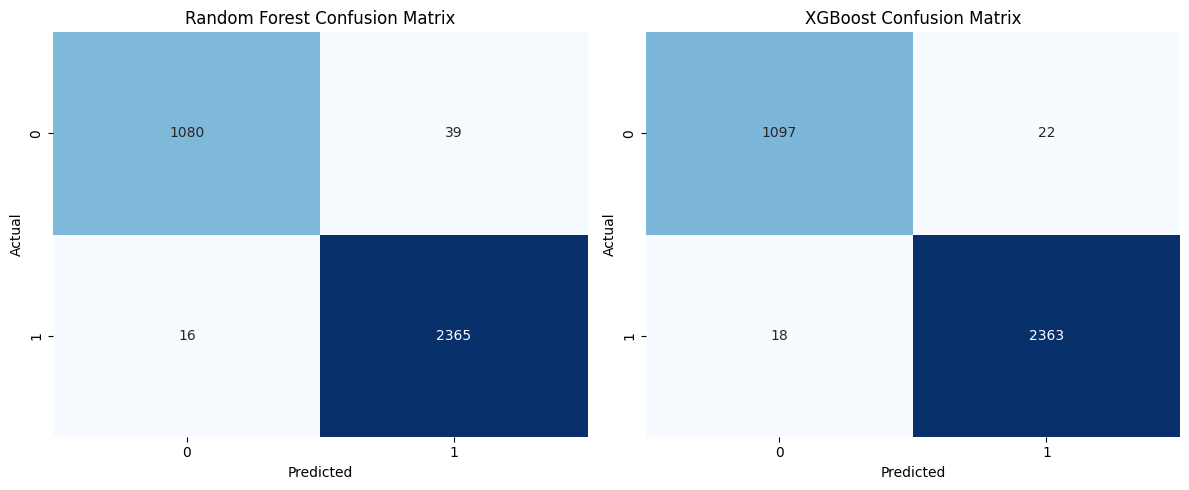

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from both models
y_pred_rf = rf_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)

# Generate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrices
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print("\nConfusion Matrix for XGBoost:")
print(cm_xgb)

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

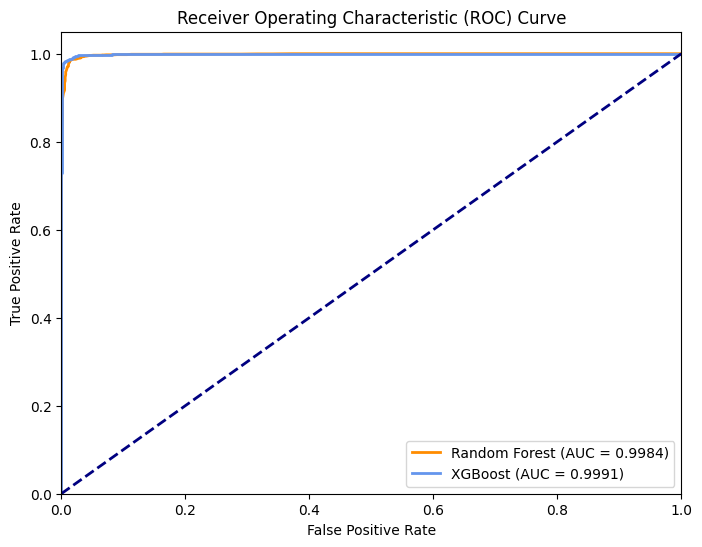

Random Forest AUC: 0.9984
XGBoost AUC: 0.9991


In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='cornflowerblue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

# Model Validation and Optimization

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define model (no eval_metric or use_label_encoder needed)
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for multiple metrics
scores_rf = cross_validate(
    model, X, y,
    cv=skf_rf,
    scoring=['accuracy','precision', 'recall','f1', 'roc_auc'],
    return_train_score=False
)

# Print results
print("Mean Accuracy:", scores_rf['test_accuracy'].mean())
print("Mean Precision Score:", scores_rf['test_precision'].mean())
print("Mean Recall:", scores_rf['test_recall'].mean())
print("Mean F1 Score:", scores_rf['test_f1'].mean())
print("Mean ROC AUC Score:", scores_rf['test_roc_auc'].mean())



Mean Accuracy: 0.9834827583391172
Mean Precision Score: 0.9824089572062118
Mean Recall: 0.9931881920103738
Mean F1 Score: 0.9877643464074272
Mean ROC AUC Score: 0.9981580828963204


In [100]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Define model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Stratified K-Fold
skf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for multiple metrics
scores_xgb = cross_validate(
    model, X, y,
    cv=skf_xgb,
    scoring=['accuracy','precision', 'recall','f1', 'roc_auc'],
    return_train_score=False
)

# Print results
print("Mean Accuracy:", scores_xgb['test_accuracy'].mean())
print("Mean Precision Score:",  scores_xgb['test_precision'].mean())
print("Mean Recall:",  scores_xgb['test_recall'].mean())
print("Mean F1 Score:",  scores_xgb['test_f1'].mean())
print("Mean ROC AUC Score:",  scores_xgb['test_roc_auc'].mean())

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:47:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:47:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:47:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:47:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:47:10] WARNING: /w

Mean Accuracy: 0.988454921814396
Mean Precision Score: 0.9888218586883906
Mean Recall: 0.9940394368403531
Mean F1 Score: 0.9914232218130271
Mean ROC AUC Score: 0.9988068355368389


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search with Stratified K-Fold CV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   scoring='recall',
                                   cv=cv,  # 👈 CV strategy used here
                                   n_iter=10,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model
random_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define parameter grid (smaller grid due to grid search's exhaustive nature)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize classifier
rf = RandomForestClassifier(random_state=42)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',  # focus on recall (or change to 'f1', 'accuracy' if needed)
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_rf_tuned = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Recall):", grid_search.best_score_)

# Calculate the accuracy
accuracy_tuned_rf = accuracy_score(y_test, y_pred_rf_tuned)

print(f"Accuracy of the hyperparameter-tuned Random Forest model: {accuracy_tuned_rf:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Confusion Matrix:
[[ 982  101]
 [  10 2407]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1083
           1       0.96      1.00      0.98      2417

    accuracy                           0.97      3500
   macro avg       0.97      0.95      0.96      3500
weighted avg       0.97      0.97      0.97      3500

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score (Recall): 0.9956217420765181


NameError: name 'y_pred_tuned_rf_tuned' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best Random Forest model
y_pred_tuned_rf = best_rf.predict(X_test)

# Calculate the accuracy
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)

print(f"Accuracy of the hyperparameter-tuned Random Forest model: {accuracy_tuned_rf:.4f}")

XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Define fixed-size hyperparameter grid (162 combinations)
param_grid = {
    'n_estimators': [100, 200, 300],         # 3 values
    'max_depth': [5, 10, 15],                # 3 values
    'learning_rate': [0.01, 0.1, 0.2],       # 3 values
    'subsample': [0.7, 0.8, 1.0],            # 3 values
    'colsample_bytree': [0.8, 1.0]           # 2 values
}

# Initialize classifier
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # You can also use 'f1' or 'accuracy'
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Predict
best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Recall):", grid_search.best_score_)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1) for both models
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='cornflowerblue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

#Comparative Results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming you have the original models (rf_classifier, xgb_classifier) and tuned models (best_rf, best_xgb) and test data (X_test, y_test) available

# Evaluate Tuned Random Forest
accuracy_tuned_rf = accuracy_score(y_test, best_rf.predict(X_test))
precision_tuned_rf = precision_score(y_test, best_rf.predict(X_test))
recall_tuned_rf = recall_score(y_test, best_rf.predict(X_test))
f1_tuned_rf = f1_score(y_test, best_rf.predict(X_test))
roc_auc_tuned_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Evaluate Tuned XGBoost
accuracy_tuned_xgb = accuracy_score(y_test, best_xgb.predict(X_test))
precision_tuned_xgb = precision_score(y_test, best_xgb.predict(X_test))
recall_tuned_xgb = recall_score(y_test, best_xgb.predict(X_test))
f1_tuned_xgb = f1_score(y_test, best_xgb.predict(X_test))
roc_auc_tuned_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])


# Create a comparison table including before and after tuning
comparison_results = {
    'Random Forest (Before Tuning)': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    'Random Forest (After Tuning)': [accuracy_tuned_rf, precision_tuned_rf, recall_tuned_rf, f1_tuned_rf, roc_auc_tuned_rf],
    'XGBoost (Before Tuning)': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb],
    'XGBoost (After Tuning)': [accuracy_tuned_xgb, precision_tuned_xgb, recall_tuned_xgb, f1_tuned_xgb, roc_auc_tuned_xgb]
}

comparison_df = pd.DataFrame(comparison_results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']).T

# Optionally round the values for better readability
comparison_df = comparison_df.round(5)

# Display the table
print("Model Performance Comparison (Before and After Tuning):")
display(comparison_df)

Model Performance Comparison (Before and After Tuning):


,Accuracy,Precision,Recall,F1-score,ROC AUC
Random Forest (Before Tuning),0.98314,0.98433,0.99062,0.98747,0.99799
Random Forest (After Tuning),0.91086,0.88817,0.99190,0.93717,0.97611
XGBoost (Before Tuning),0.98914,0.99148,0.99233,0.99190,0.99947
XGBoost (After Tuning),0.98400,0.98029,0.99616,0.98816,0.99834


#test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Function to compute all metrics in the format shown in the picture
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_all = accuracy_score(pd.concat([y_train, y_test]),
                             pd.concat([pd.Series(y_pred_train), pd.Series(y_pred_test)]))

    # Precision, Recall, F1 per class
    prec = precision_score(y_test, y_pred_test, average=None)  # [No Damage, Damage]
    rec = recall_score(y_test, y_pred_test, average=None)
    f1 = f1_score(y_test, y_pred_test, average=None)

    return {
        'Train Acc': round(acc_train, 4),
        'Test Acc': round(acc_test, 4),
        'All Acc': round(acc_all, 4),
        'Prec Active Fault': round(prec[0], 4),
        'Prec Ring of Fire': round(prec[1], 4),
        'Rec Active Fault': round(rec[0], 4),
        'Rec Ring of Fire': round(rec[1], 4),
        'F1 Active Fault': round(f1[0], 4),
        'F1 Ring of Fire': round(f1[1], 4)
    }

# Example usage for before & after tuning models
results = {}
results['RF Before'] = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
results['RF After'] = evaluate_model(best_rf, X_train, y_train, X_test, y_test)
results['XGB Before'] = evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)
results['XGB After'] = evaluate_model(best_xgb, X_train, y_train, X_test, y_test)

# Convert to DataFrame
df_comparison = pd.DataFrame(results).T

# Reorder columns like the example picture
df_comparison = df_comparison[[
    'Train Acc', 'Test Acc', 'All Acc',
    'Prec Active Fault','Prec Ring of Fire',
    'Rec Active Fault', 'Rec Ring of Fire',
    'F1 Active Fault', 'F1 Ring of Fire'
]]

print(df_comparison)


In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions from XGBoost model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Print confusion matrix
print("Confusion Matrix for Tuned XGBoost:")
print(cm_xgb_tuned)

Confusion Matrix for Tuned XGBoost:
[[1107   47]
 [   9 2337]]


# Extra with ROC and AUC

Random Forest

XGBOOSt

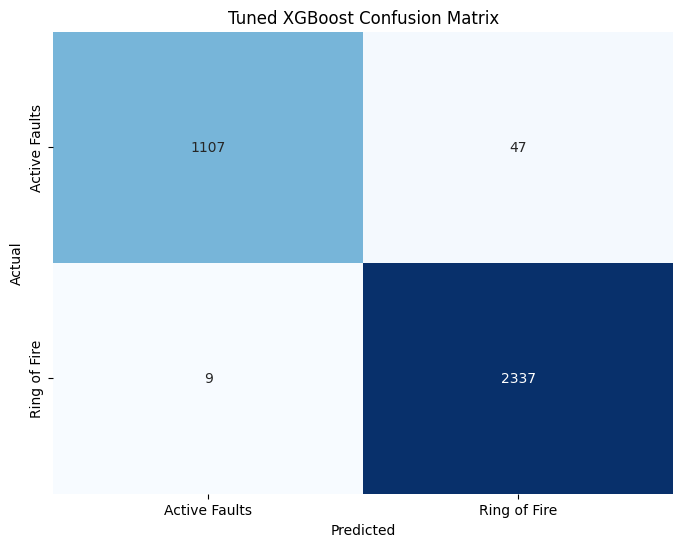

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from XGBoost model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for Tuned Random Forest:
[[ 861  293]
 [  19 2327]]

Confusion Matrix for Tuned XGBoost:
[[1107   47]
 [   9 2337]]


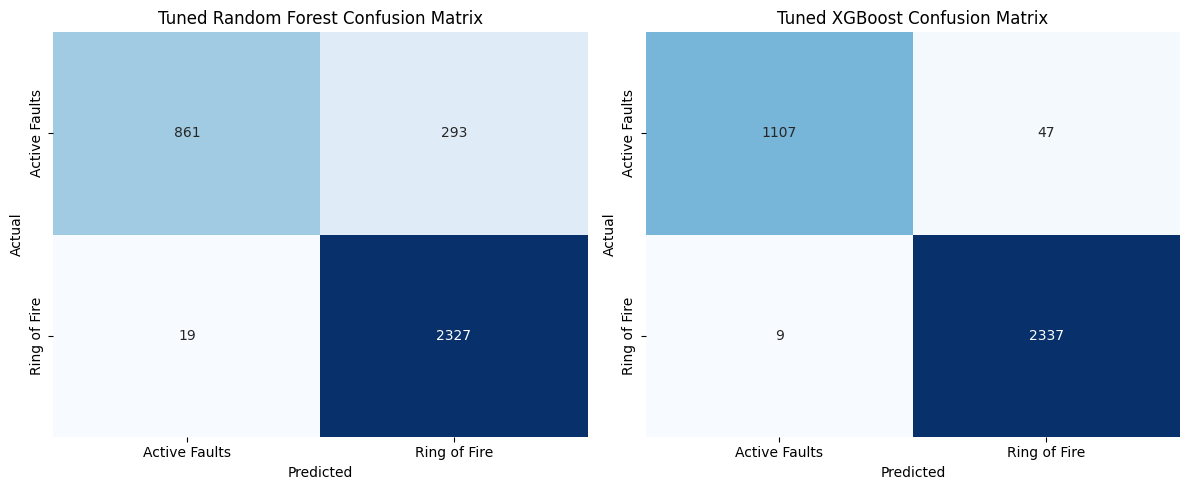

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from both models
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)


# Generate confusion matrices
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Print confusion matrices
print("Confusion Matrix for Tuned Random Forest:")
print(cm_rf_tuned)
print("\nConfusion Matrix for Tuned XGBoost:")
print(cm_xgb_tuned)


# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

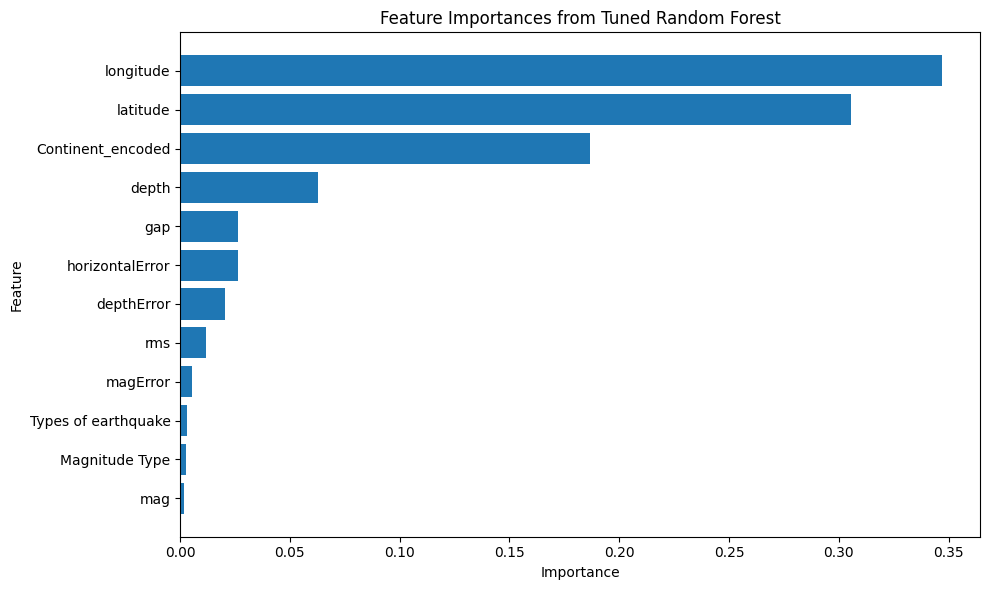

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()

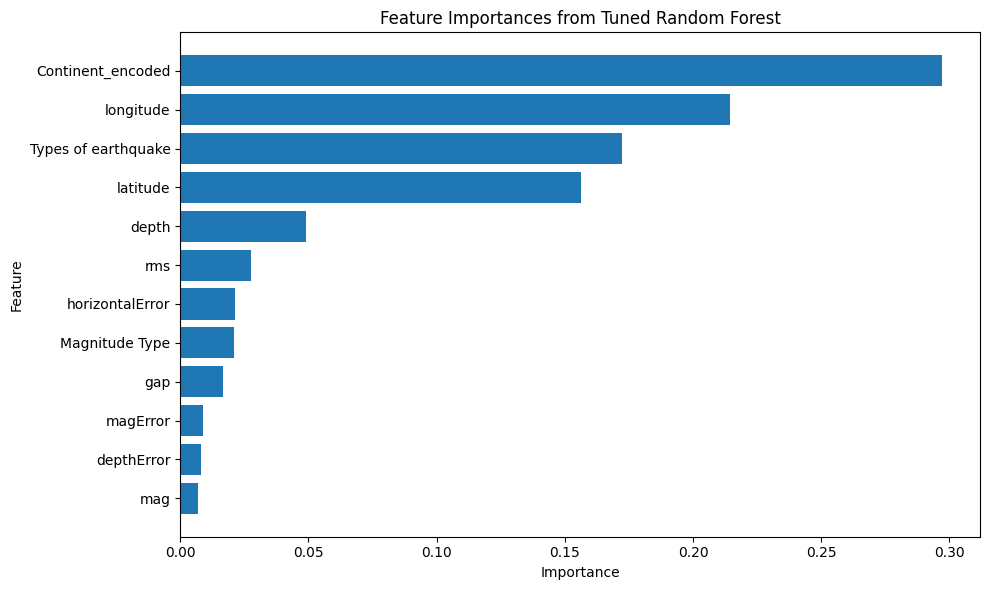

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = best_xgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.tight_layout()

## Earthquake Analysis Dashboard

This dashboard presents key findings and model performance metrics from the analysis of earthquake data.

### 1. Data Summary Statistics

In [ ]:
display(df.describe())

,latitude,longitude,depth,mag,gap,rms,horizontalError,depthError,magError,Year,Continent_encoded,Zone Classification,Types of earthquake,Magnitude Type
count,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17497.000000,17386.000000,17497.000000,17497.000000,17497.000000,17497.000000
mean,-3.252000,31.923169,52.992789,5.333634,59.866380,0.818836,7.598919,2.839780,0.064627,2019.761532,3.800480,0.660056,0.006458,5.082300
std,30.598138,123.874337,103.533028,0.404520,34.249738,0.209936,2.133354,1.460572,0.019115,2.941412,1.731002,0.473703,0.112712,4.391958
min,-71.733900,-179.989700,-1.010000,5.000000,8.000000,0.480000,3.800000,1.600000,0.033000,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,-22.928000,-74.417300,10.000000,5.100000,35.000000,0.660000,6.100000,1.800000,0.050000,2017.000000,2.000000,0.000000,0.000000,0.000000
50%,-5.837100,87.465900,11.990000,5.200000,53.000000,0.800000,7.500000,1.900000,0.065000,2020.000000,5.000000,1.000000,0.000000,9.000000
75%,18.297200,142.121200,45.480000,5.500000,76.000000,0.960000,9.100000,4.000000,0.078000,2022.000000,5.000000,1.000000,0.000000,9.000000
max,87.386000,179.998100,670.810000,8.300000,340.000000,1.240000,11.700000,6.035000,0.102000,2025.000000,6.000000,1.000000,2.000000,9.000000


### 2. Earthquake Frequency by Classification Zone

/tmp/ipython-input-1035892608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='viridis')


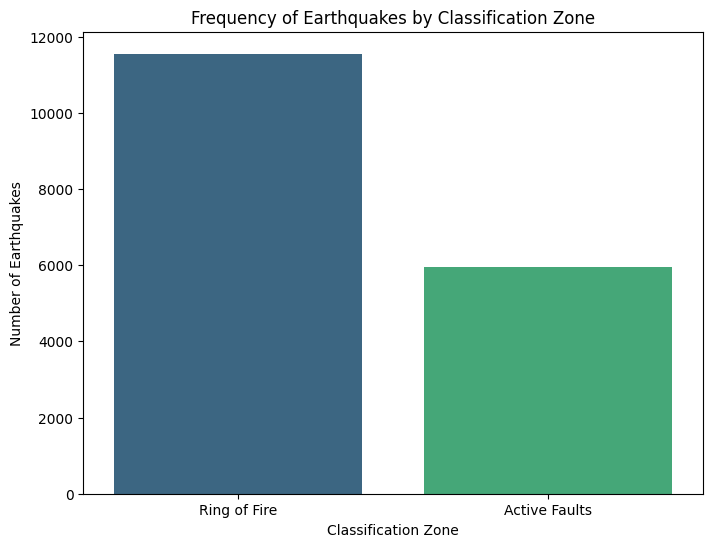

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of earthquakes in each Classification Zone
zone_counts = df['Classification Zone'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='viridis')
plt.xlabel("Classification Zone")
plt.ylabel("Number of Earthquakes")
plt.title("Frequency of Earthquakes by Classification Zone")
plt.show()

### 3. Top Countries with Most Earthquakes by Classification Zone

In [ ]:
# Group by Classification Zone and Country, then count
country_zone_counts = df.groupby(['Classification Zone', 'Country']).size().reset_index(name='Count')

# Find the top countries for each zone
top_countries_rf = country_zone_counts[country_zone_counts['Classification Zone'] == 'Ring of Fire'].sort_values(by='Count', ascending=False).head(10)
top_countries_af = country_zone_counts[country_zone_counts['Classification Zone'] == 'Active Faults'].sort_values(by='Count', ascending=False).head(10)

print("Top 10 Countries with Most Earthquakes in Ring of Fire:")
display(top_countries_rf)

print("\nTop 10 Countries with Most Earthquakes in Active Faults:")
display(top_countries_af)

Top 10 Countries with Most Earthquakes in Ring of Fire:


,Classification Zone,Country,Count
136,Ring of Fire,Indonesia,1963
149,Ring of Fire,Tonga,1782
142,Ring of Fire,Papua New Guinea,1169
137,Ring of Fire,Japan,1110
127,Ring of Fire,Chile,872
144,Ring of Fire,Philippines,716
151,Ring of Fire,Vanuatu,656
150,Ring of Fire,United States,531
139,Ring of Fire,New Zealand,459
146,Ring of Fire,Solomon Islands,427



Top 10 Countries with Most Earthquakes in Active Faults:


,Classification Zone,Country,Count
104,Active Faults,South Georgia and the South Sandwich Islands,956
80,Active Faults,New Caledonia,430
95,Active Faults,Russian Federation,411
97,Active Faults,"Saint Helena, Ascension and Tristan da Cunha",350
21,Active Faults,China,279
84,Active Faults,Northern Mariana Islands,277
10,Active Faults,Australia,186
8,Active Faults,Argentina,173
121,Active Faults,Wallis and Futuna,158
89,Active Faults,Pitcairn,148


### 4. Top Countries with Highest Average Magnitude by Classification Zone

In [ ]:
# Group by Classification Zone and Country, then calculate mean magnitude
country_zone_mag_mean = df.groupby(['Classification Zone', 'Country'])['mag'].mean().reset_index()

# Find the top countries for each zone by average magnitude
top_mag_countries_rf = country_zone_mag_mean[country_zone_mag_mean['Classification Zone'] == 'Ring of Fire'].sort_values(by='mag', ascending=False).head(10)
top_mag_countries_af = country_zone_mag_mean[country_zone_mag_mean['Classification Zone'] == 'Active Faults'].sort_values(by='mag', ascending=False).head(10)

print("Top 10 Countries with Highest Average Magnitude in Ring of Fire:")
display(top_mag_countries_rf)

print("\nTop 10 Countries with Highest Average Magnitude in Active Faults:")
display(top_mag_countries_af)

Top 10 Countries with Highest Average Magnitude in Ring of Fire:


,Classification Zone,Country,mag
135,Ring of Fire,Honduras,5.600000
130,Ring of Fire,Ecuador,5.491096
126,Ring of Fire,Canada,5.484746
132,Ring of Fire,Fiji,5.484302
141,Ring of Fire,Panama,5.450000
134,Ring of Fire,Guatemala,5.411940
138,Ring of Fire,Mexico,5.411899
150,Ring of Fire,United States,5.397928
127,Ring of Fire,Chile,5.394610
151,Ring of Fire,Vanuatu,5.365091



Top 10 Countries with Highest Average Magnitude in Active Faults:


,Classification Zone,Country,mag
54,Active Faults,Jamaica,6.550000
27,Active Faults,Croatia,5.850000
20,Active Faults,Cayman Islands,5.814286
110,Active Faults,Thailand,5.800000
96,Active Faults,Rwanda,5.650000
68,Active Faults,Martinique,5.600000
124,Active Faults,Zimbabwe,5.600000
31,Active Faults,Dominica,5.600000
28,Active Faults,Cuba,5.587500
83,Active Faults,North Korea,5.566667


### 5. Model Performance Comparison

In [ ]:
display(df_comparison)

,Train Acc,Test Acc,All Acc,Prec Active Fault,Prec Ring of Fire,Rec Active Fault,Rec Ring of Fire,F1 Active Fault,F1 Ring of Fire
RF Before,1.0000,0.9831,0.9966,0.9807,0.9843,0.9679,0.9906,0.9743,0.9875
RF After,0.9066,0.9109,0.9074,0.9784,0.8882,0.7461,0.9919,0.8466,0.9372
XGB Before,1.0000,0.9891,0.9978,0.9844,0.9915,0.9827,0.9923,0.9835,0.9919
XGB After,0.9881,0.9840,0.9873,0.9919,0.9803,0.9593,0.9962,0.9753,0.9882


### 6. Confusion Matrices (Tuned Models)

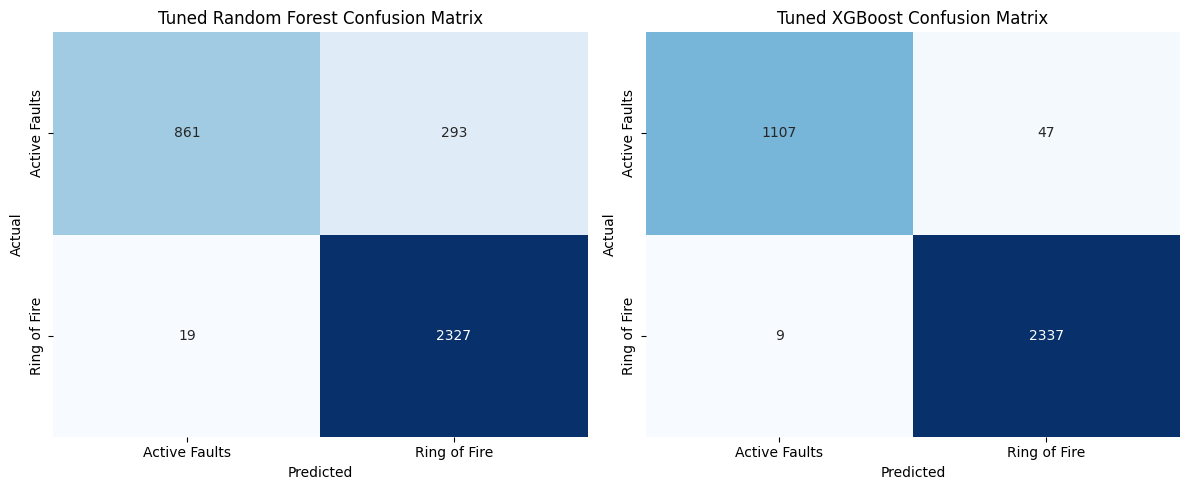

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test, best_rf, and best_xgb are available from previous steps

# Get predictions from both models
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrices
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### 7. Feature Importance Plots (Tuned Models)

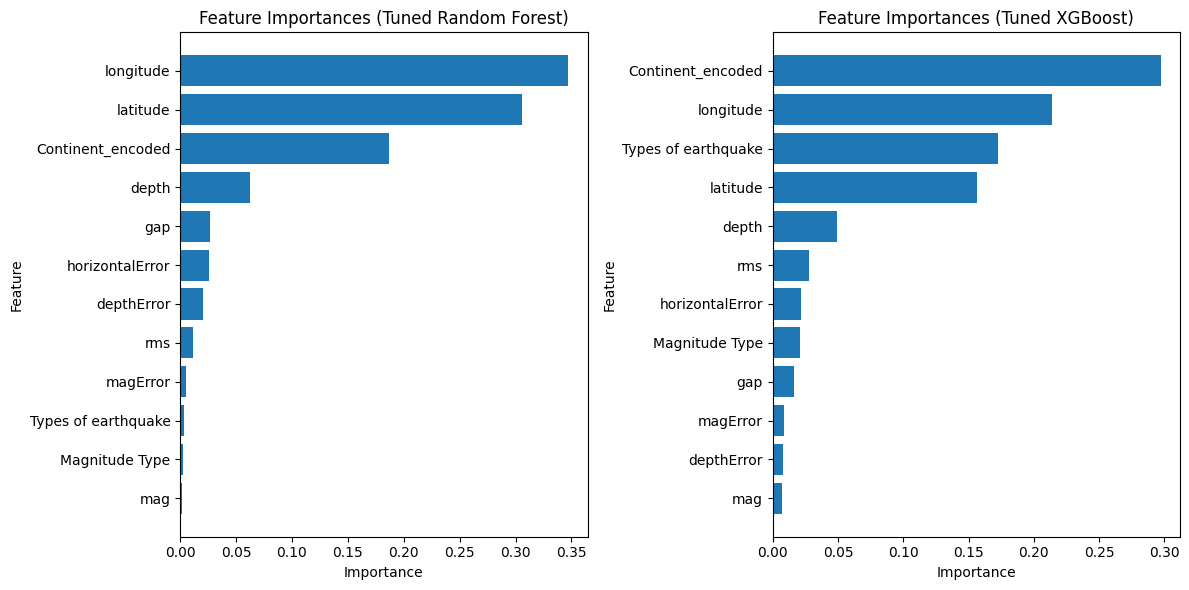

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_rf, best_xgb, and X_train are available from previous steps

# Get feature importances from the best Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Get feature importances from the best XGBoost model
feature_importances_xgb = best_xgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create DataFrames for easier plotting
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})


# Sort features by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)


# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned Random Forest)')
plt.gca().invert_yaxis() # Invert y-axis

plt.subplot(1, 2, 2)
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned XGBoost)')
plt.gca().invert_yaxis() # Invert y-axis

plt.tight_layout()
plt.show()

### Dashboard End

In [ ]:
most_powerful_earthquake = df.loc[df['mag'].idxmax()]
print(f"The country with the highest magnitude earthquake is: {most_powerful_earthquake['Country']}")
print(f"The magnitude of this earthquake was: {most_powerful_earthquake['mag']}")
print(f"It occurred in: {most_powerful_earthquake['place']}")
print(f"On: {most_powerful_earthquake['time']}")

The country with the highest magnitude earthquake is: Chile
The magnitude of this earthquake was: 8.3
It occurred in: 48 km W of Illapel, Chile
On: 2015-09-16 22:54:32.860000+00:00


In [ ]:
# Sort by 'mag' in descending order and select the top 10
top_10_earthquakes = df.sort_values(by='mag', ascending=False).head(10)

print("Top 10 Highest Magnitude Earthquakes:")
display(top_10_earthquakes)

Top 10 Highest Magnitude Earthquakes:


,time,latitude,longitude,depth,mag,gap,rms,place,horizontalError,depthError,magError,Country,Classification Zone,Year,Month,Location_Type,Continent_encoded,Zone Classification,Types of earthquake,Magnitude Type
16418,2015-09-16 22:54:32.860000+00:00,-31.5729,-71.6744,22.44,8.3,19.00000,1.02,"48 km W of Illapel, Chile",4.700000,3.2,0.065819,Chile,Ring of Fire,2015.0,September,Land,6,1,0,9
11677,2018-08-19 00:19:40.670000+00:00,-18.1125,-178.1530,600.00,8.2,13.00000,0.79,"267 km E of Levuka, Fiji",9.600000,1.9,0.045000,Wallis and Futuna,Active Faults,2018.0,August,Land,5,0,0,9
13203,2017-09-08 04:49:19.180000+00:00,15.0222,-93.8993,47.39,8.2,22.00000,1.22,"near the coast of Chiapas, Mexico",6.200000,3.7,0.058000,Mexico,Ring of Fire,2017.0,September,Land,4,1,0,9
6522,2021-07-29 06:15:49.188000+00:00,55.3635,-157.8876,35.00,8.2,59.86638,0.95,Alaska Peninsula,7.605025,1.6,0.065819,United States,Ring of Fire,2021.0,July,Land,4,1,0,9
7364,2021-03-04 19:28:33.178000+00:00,-29.7228,-177.2794,28.93,8.1,21.00000,0.69,"Kermadec Islands, New Zealand",7.700000,3.3,0.034000,Tonga,Ring of Fire,2021.0,March,Sea,5,1,0,9
6434,2021-08-12 18:35:17.231000+00:00,-58.3753,-25.2637,22.79,8.1,78.00000,0.76,South Sandwich Islands region,8.000000,3.6,0.065000,South Georgia and the South Sandwich Islands,Active Faults,2021.0,August,Sea,6,0,0,9
10243,2019-05-26 07:41:15.073000+00:00,-5.8119,-75.2697,122.57,8.0,17.00000,0.84,"78 km NE of Navarro, Peru",7.000000,4.0,0.036000,Peru,Ring of Fire,2019.0,May,Land,6,1,0,9
12610,2018-01-23 09:31:40.890000+00:00,56.0039,-149.1658,14.06,7.9,30.00000,0.77,"261 km SE of Chiniak, Alaska",6.000000,2.8,0.034000,United States,Ring of Fire,2018.0,January,Land,4,1,0,9
14131,2017-01-22 04:30:22.960000+00:00,-6.2464,155.1718,135.00,7.9,9.00000,1.22,"35 km WNW of Panguna, Papua New Guinea",7.300000,1.8,0.042000,Papua New Guinea,Ring of Fire,2017.0,January,Land,5,1,0,9
14366,2016-12-17 10:51:10.500000+00:00,-4.5049,153.5216,94.54,7.9,13.00000,0.97,"140 km E of Kokopo, Papua New Guinea",7.300000,3.8,0.065819,Papua New Guinea,Ring of Fire,2016.0,December,Land,5,1,0,9


In [ ]:
import plotly.express as px

# Create a scatter plot on a geographical map
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     size='mag',         # Size of markers based on magnitude
                     color='mag',        # Color of markers based on magnitude
                     hover_name='place', # Show place name on hover
                     projection="natural earth", # Specify map projection
                     title='Global Earthquake Distribution by Magnitude',
                     color_continuous_scale=px.colors.sequential.Plasma, # Color scale
                     hover_data=['Classification Zone', 'depth', 'Country', 'Continent_encoded']) # Include additional data on hover

fig.show()

/tmp/ipython-input-3390147967.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




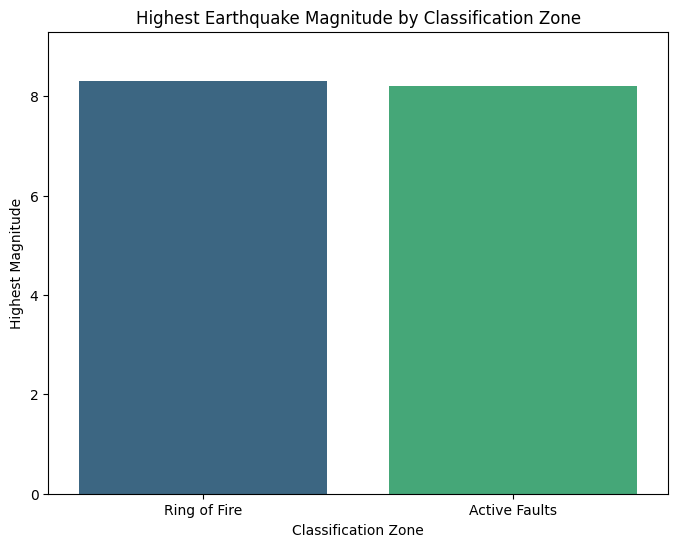

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each classification zone
ring_of_fire_df = df[df['Classification Zone'] == 'Ring of Fire']
active_faults_df = df[df['Classification Zone'] == 'Active Faults']

# Find the highest magnitude in each zone
highest_mag_rf = ring_of_fire_df['mag'].max()
highest_mag_af = active_faults_df['mag'].max()

# Create a DataFrame for plotting
highest_mag_comparison = pd.DataFrame({
    'Classification Zone': ['Ring of Fire', 'Active Faults'],
    'Highest Magnitude': [highest_mag_rf, highest_mag_af]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Classification Zone', y='Highest Magnitude', data=highest_mag_comparison, palette='viridis')
plt.title('Highest Earthquake Magnitude by Classification Zone')
plt.xlabel('Classification Zone')
plt.ylabel('Highest Magnitude')
plt.ylim(0, highest_mag_comparison['Highest Magnitude'].max() + 1) # Set y-limit for better visualization
plt.show()